___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# K-Means Clustering


Let's work through an example of unsupervised learning - clustering customer data.

## Goal:

When working with unsupervised learning methods, its usually important to lay out a general goal. In our case, let's attempt to find reasonable clusters of customers for marketing segmentation and study. What we end up doing with those clusters would depend **heavily** on the domain itself, in this case, marketing.

----

## The Data

LINK: https://archive.ics.uci.edu/ml/datasets/bank+marketing

   This dataset is public available for research. The details are described in [Moro et al., 2011]. 


      [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
      In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

      Available at: [pdf] http://hdl.handle.net/1822/14838
                    [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
     For more information, read [Moro et al., 2011].

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("../DATA/bank-full.csv")

In [3]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe().transpose()

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

### Continuous Feature Analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

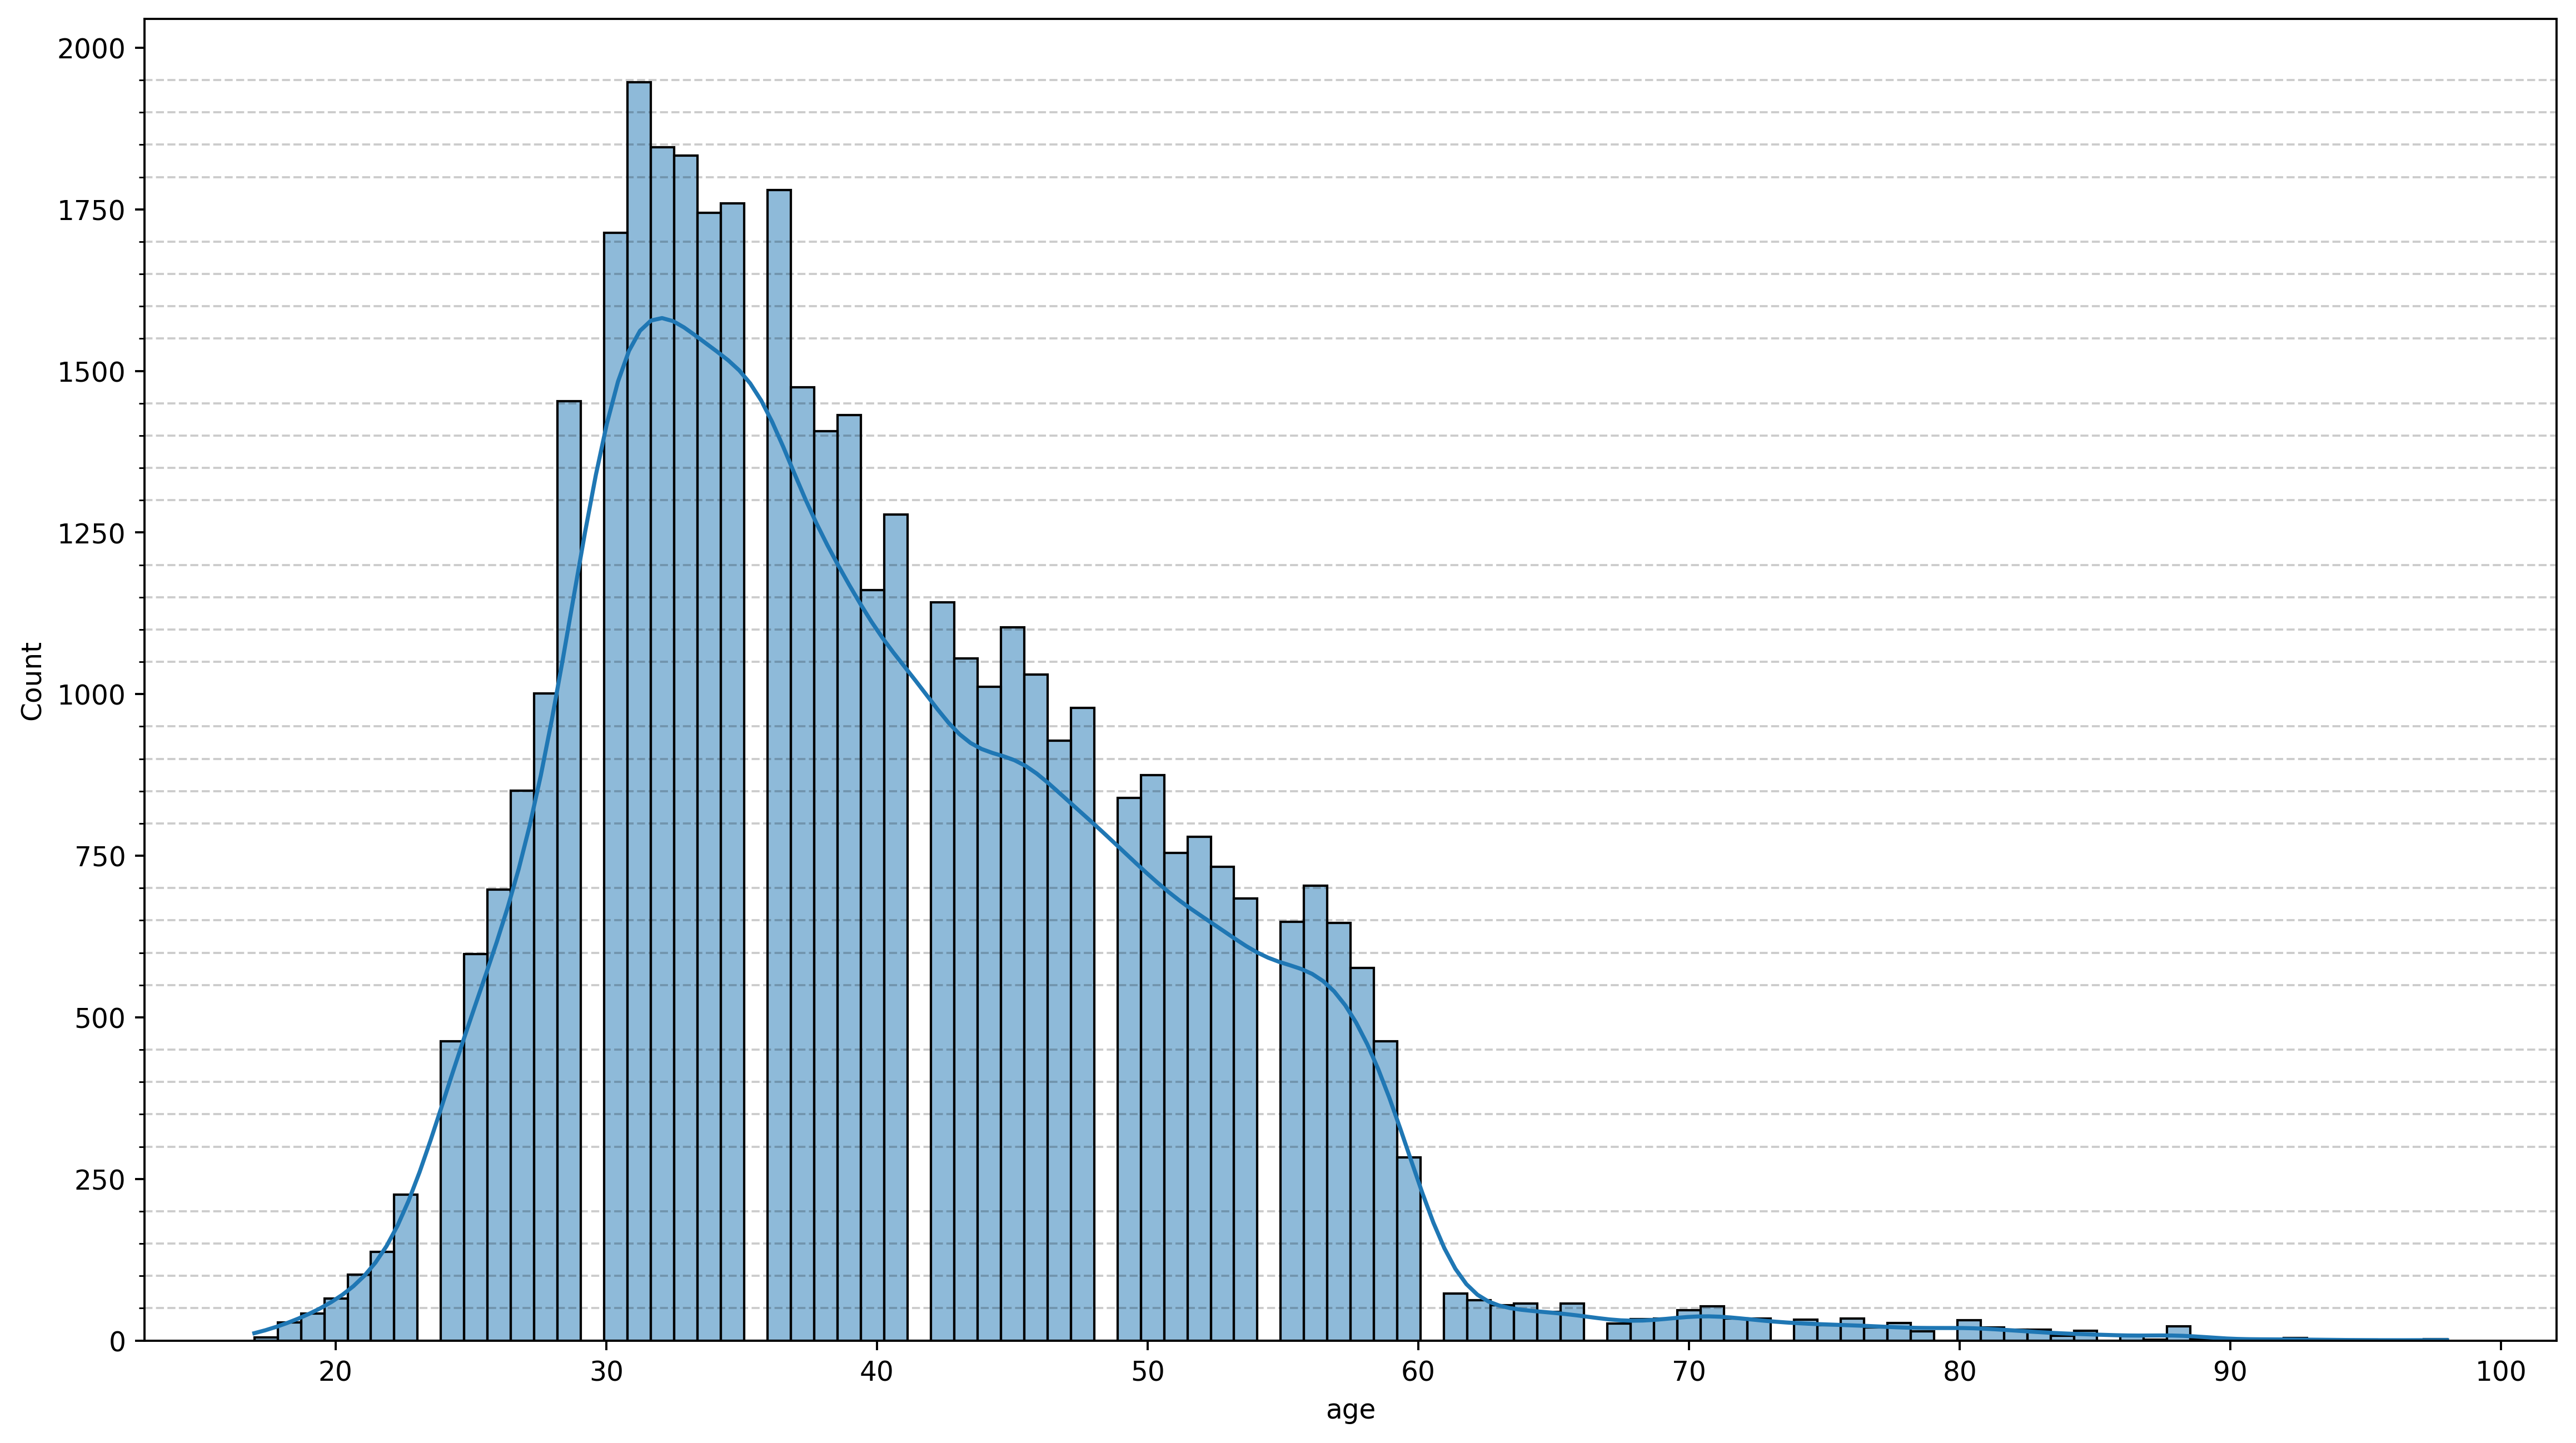

In [7]:
fig, ax = plt.subplots(figsize=(16, 9),dpi=350)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(which='minor', color='black',alpha=0.2, linestyle='--')
sns.histplot(data=df,x='age',kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

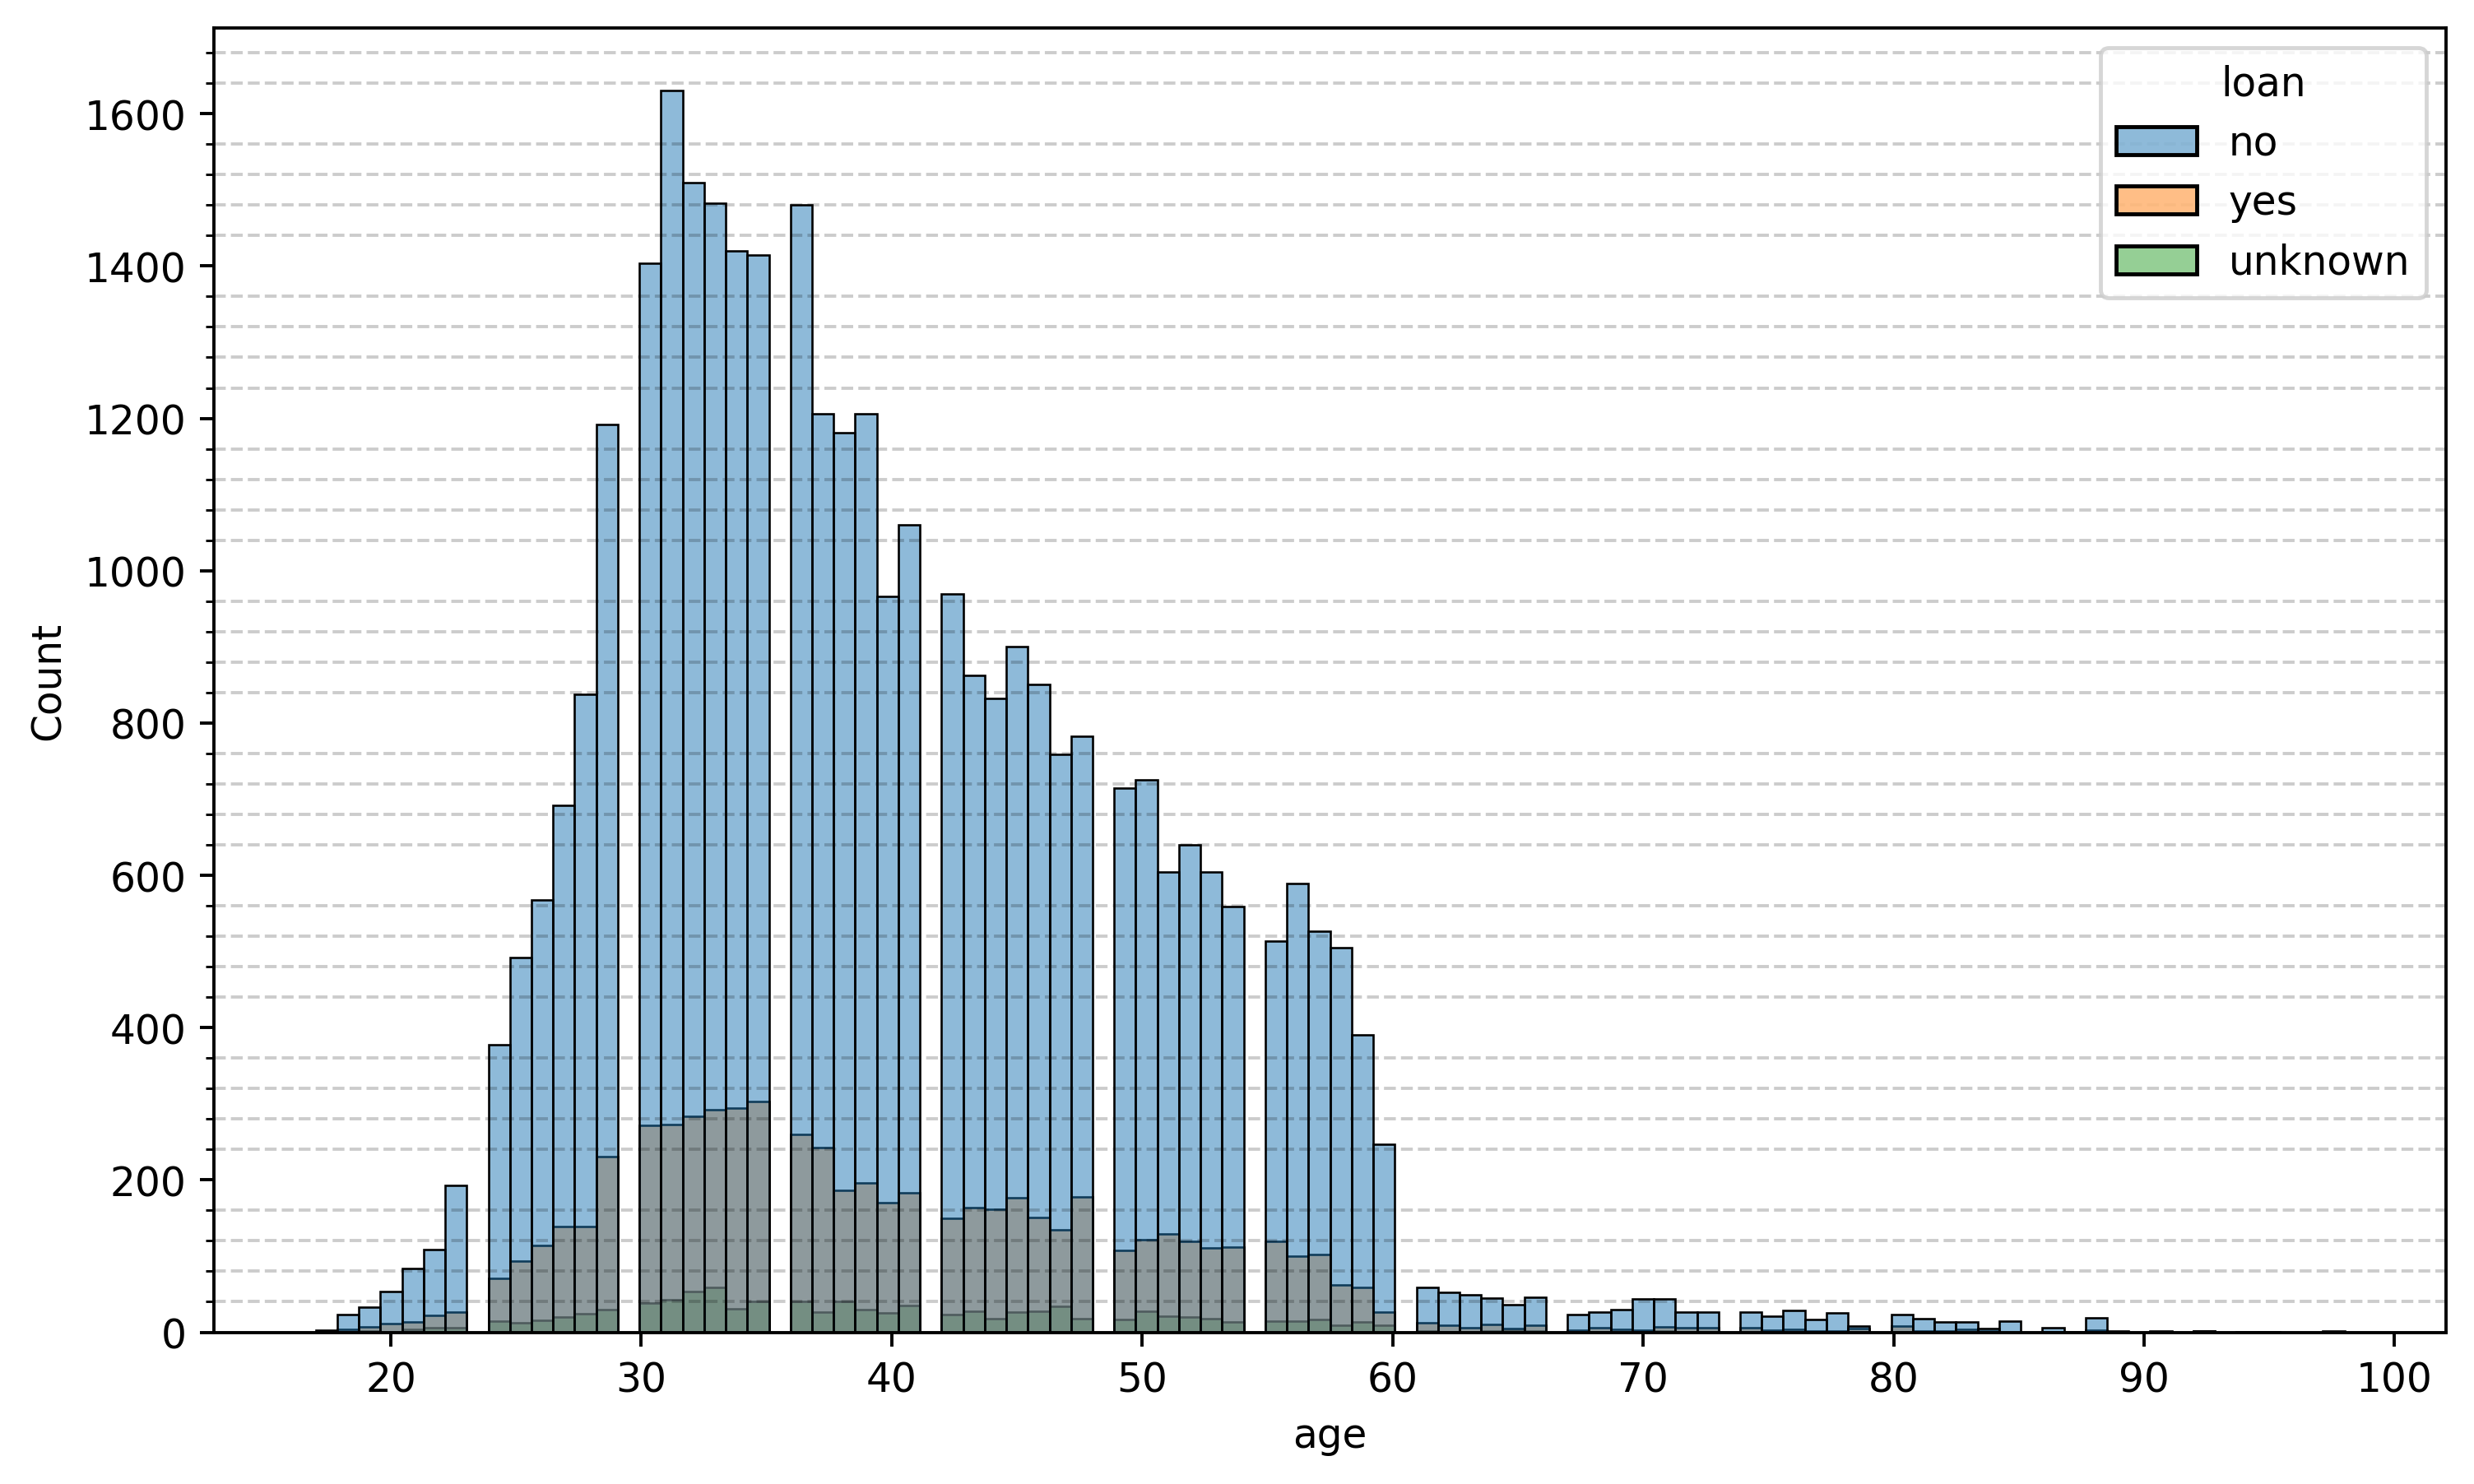

In [8]:
fig, ax = plt.subplots(figsize=(10, 6),dpi=350)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(which='minor', color='black',alpha=0.2, linestyle='--')
sns.histplot(data=df,x='age',hue='loan')

<AxesSubplot:xlabel='pdays', ylabel='Count'>

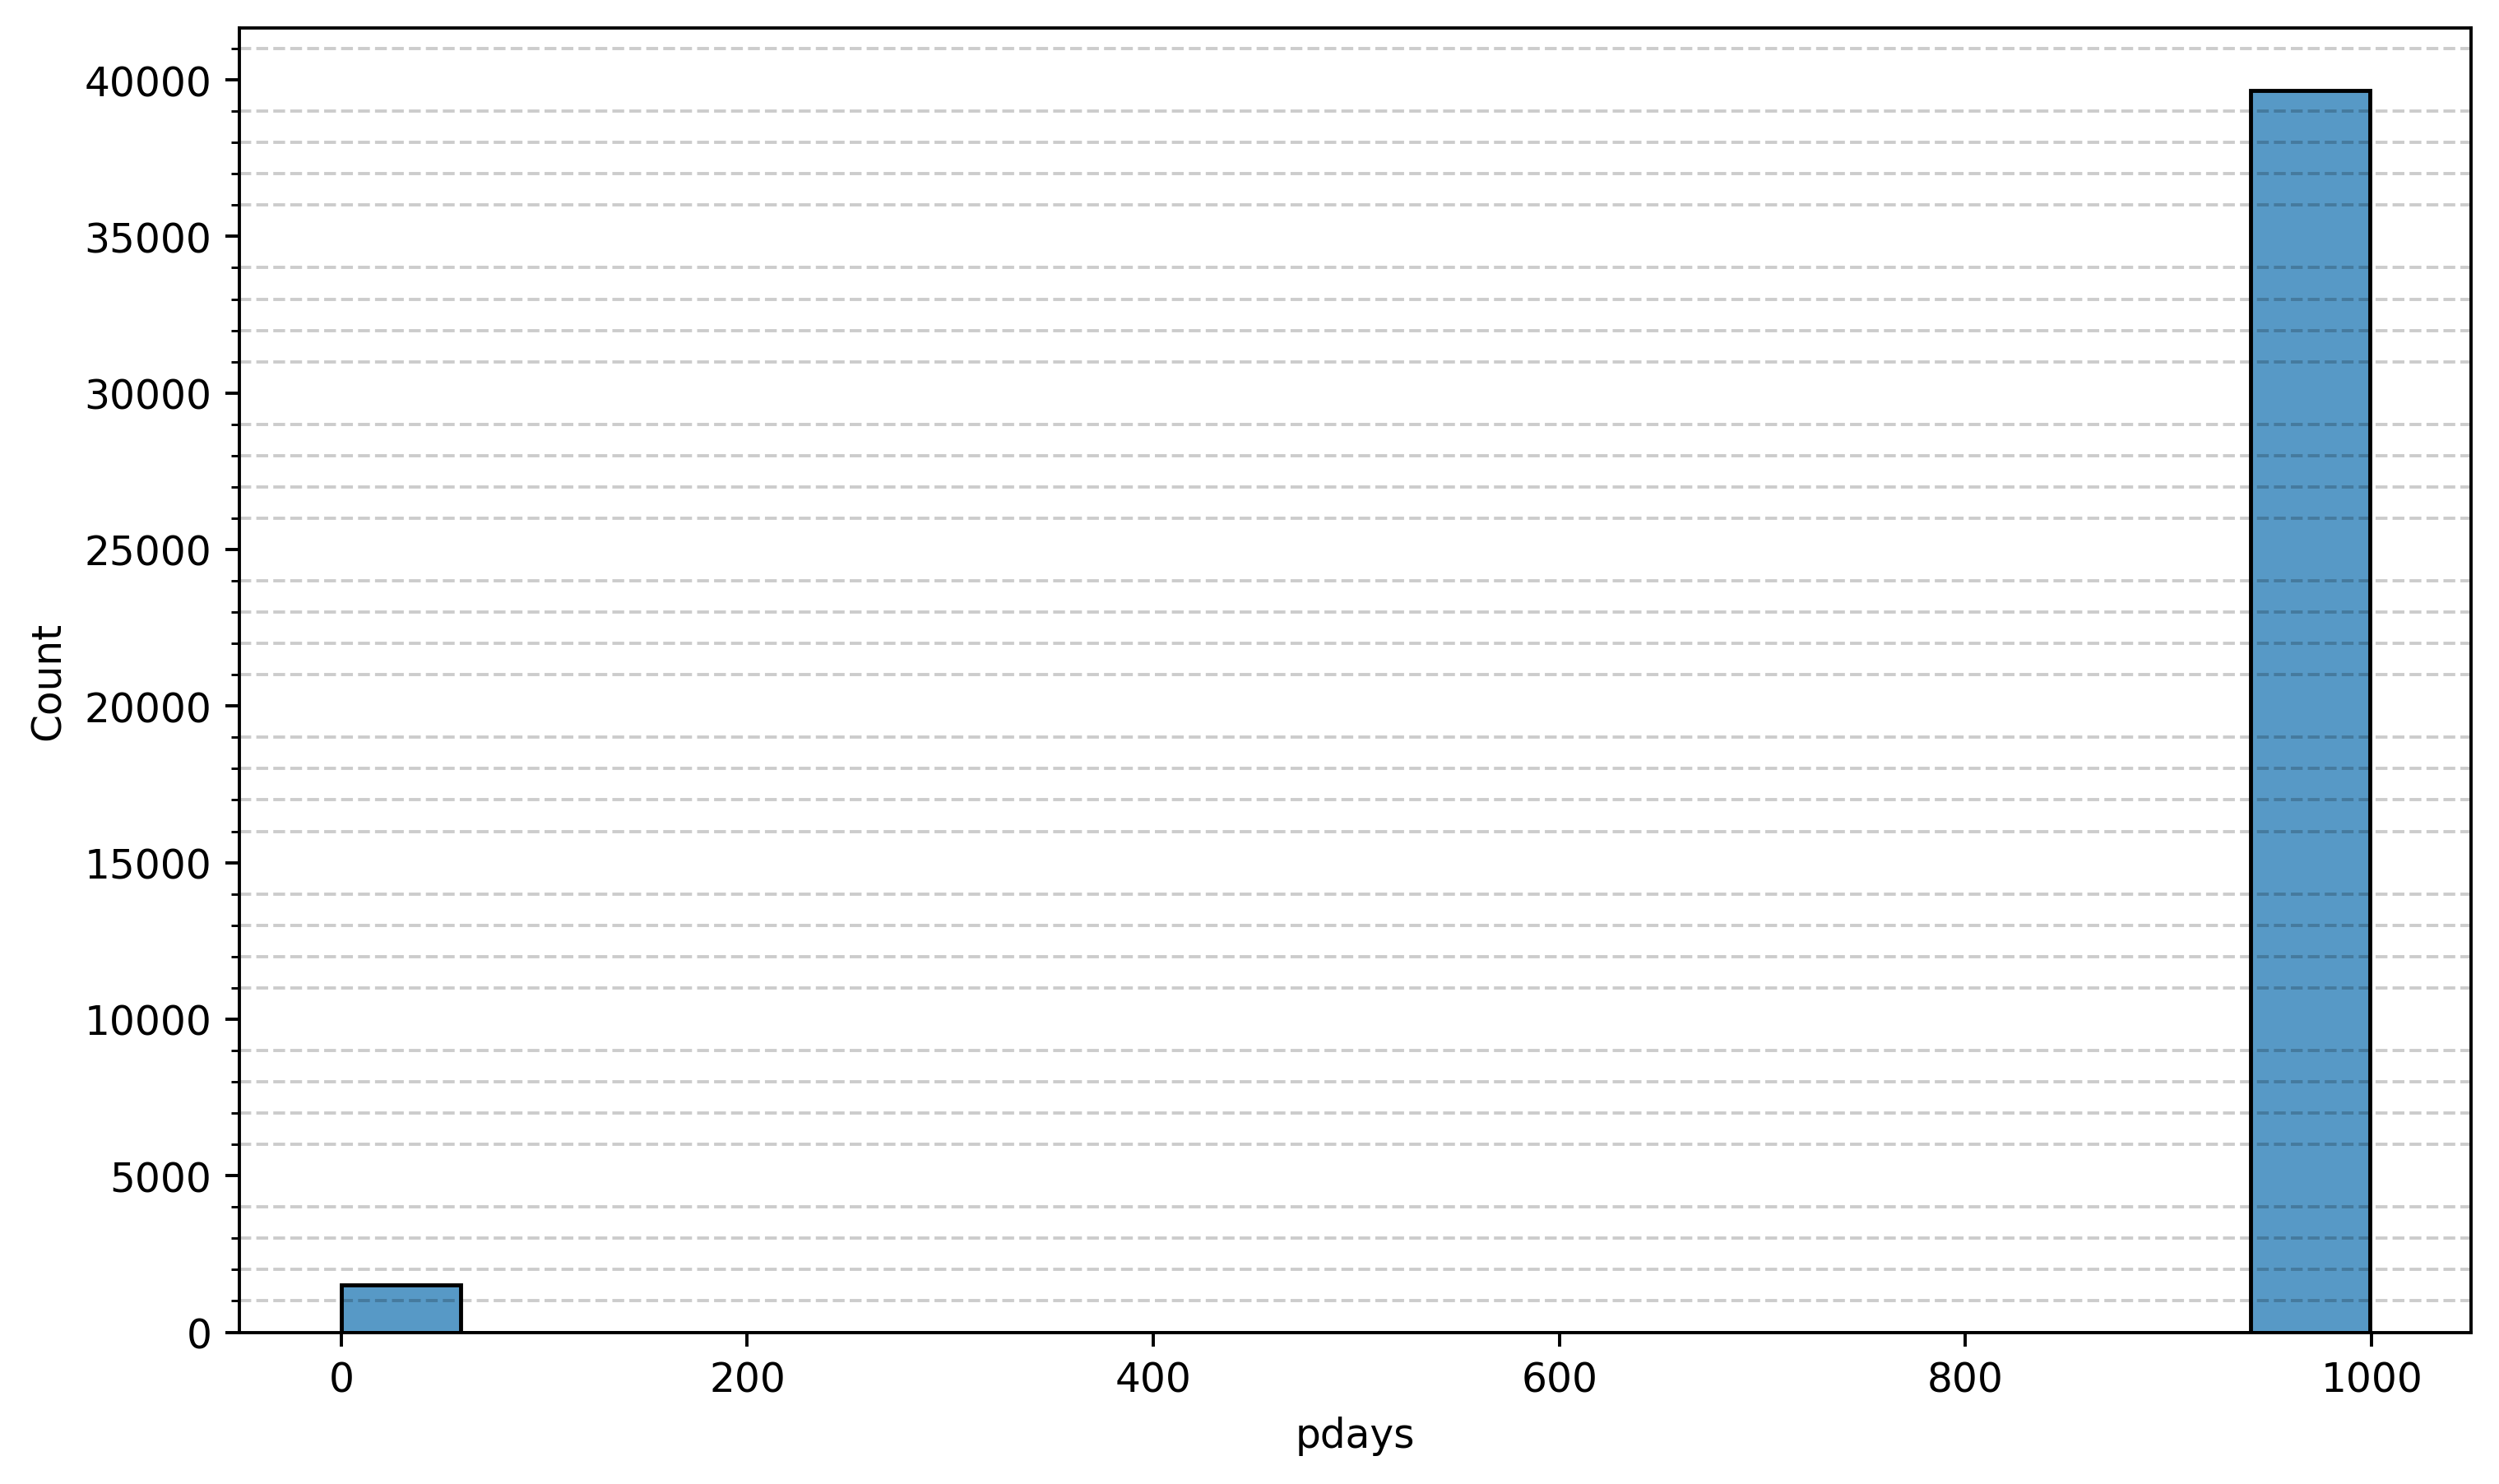

In [9]:
fig, ax = plt.subplots(figsize=(10, 6),dpi=350)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(which='minor', color='black',alpha=0.2, linestyle='--')
sns.histplot(data=df,x='pdays')

<AxesSubplot:xlabel='pdays', ylabel='Count'>

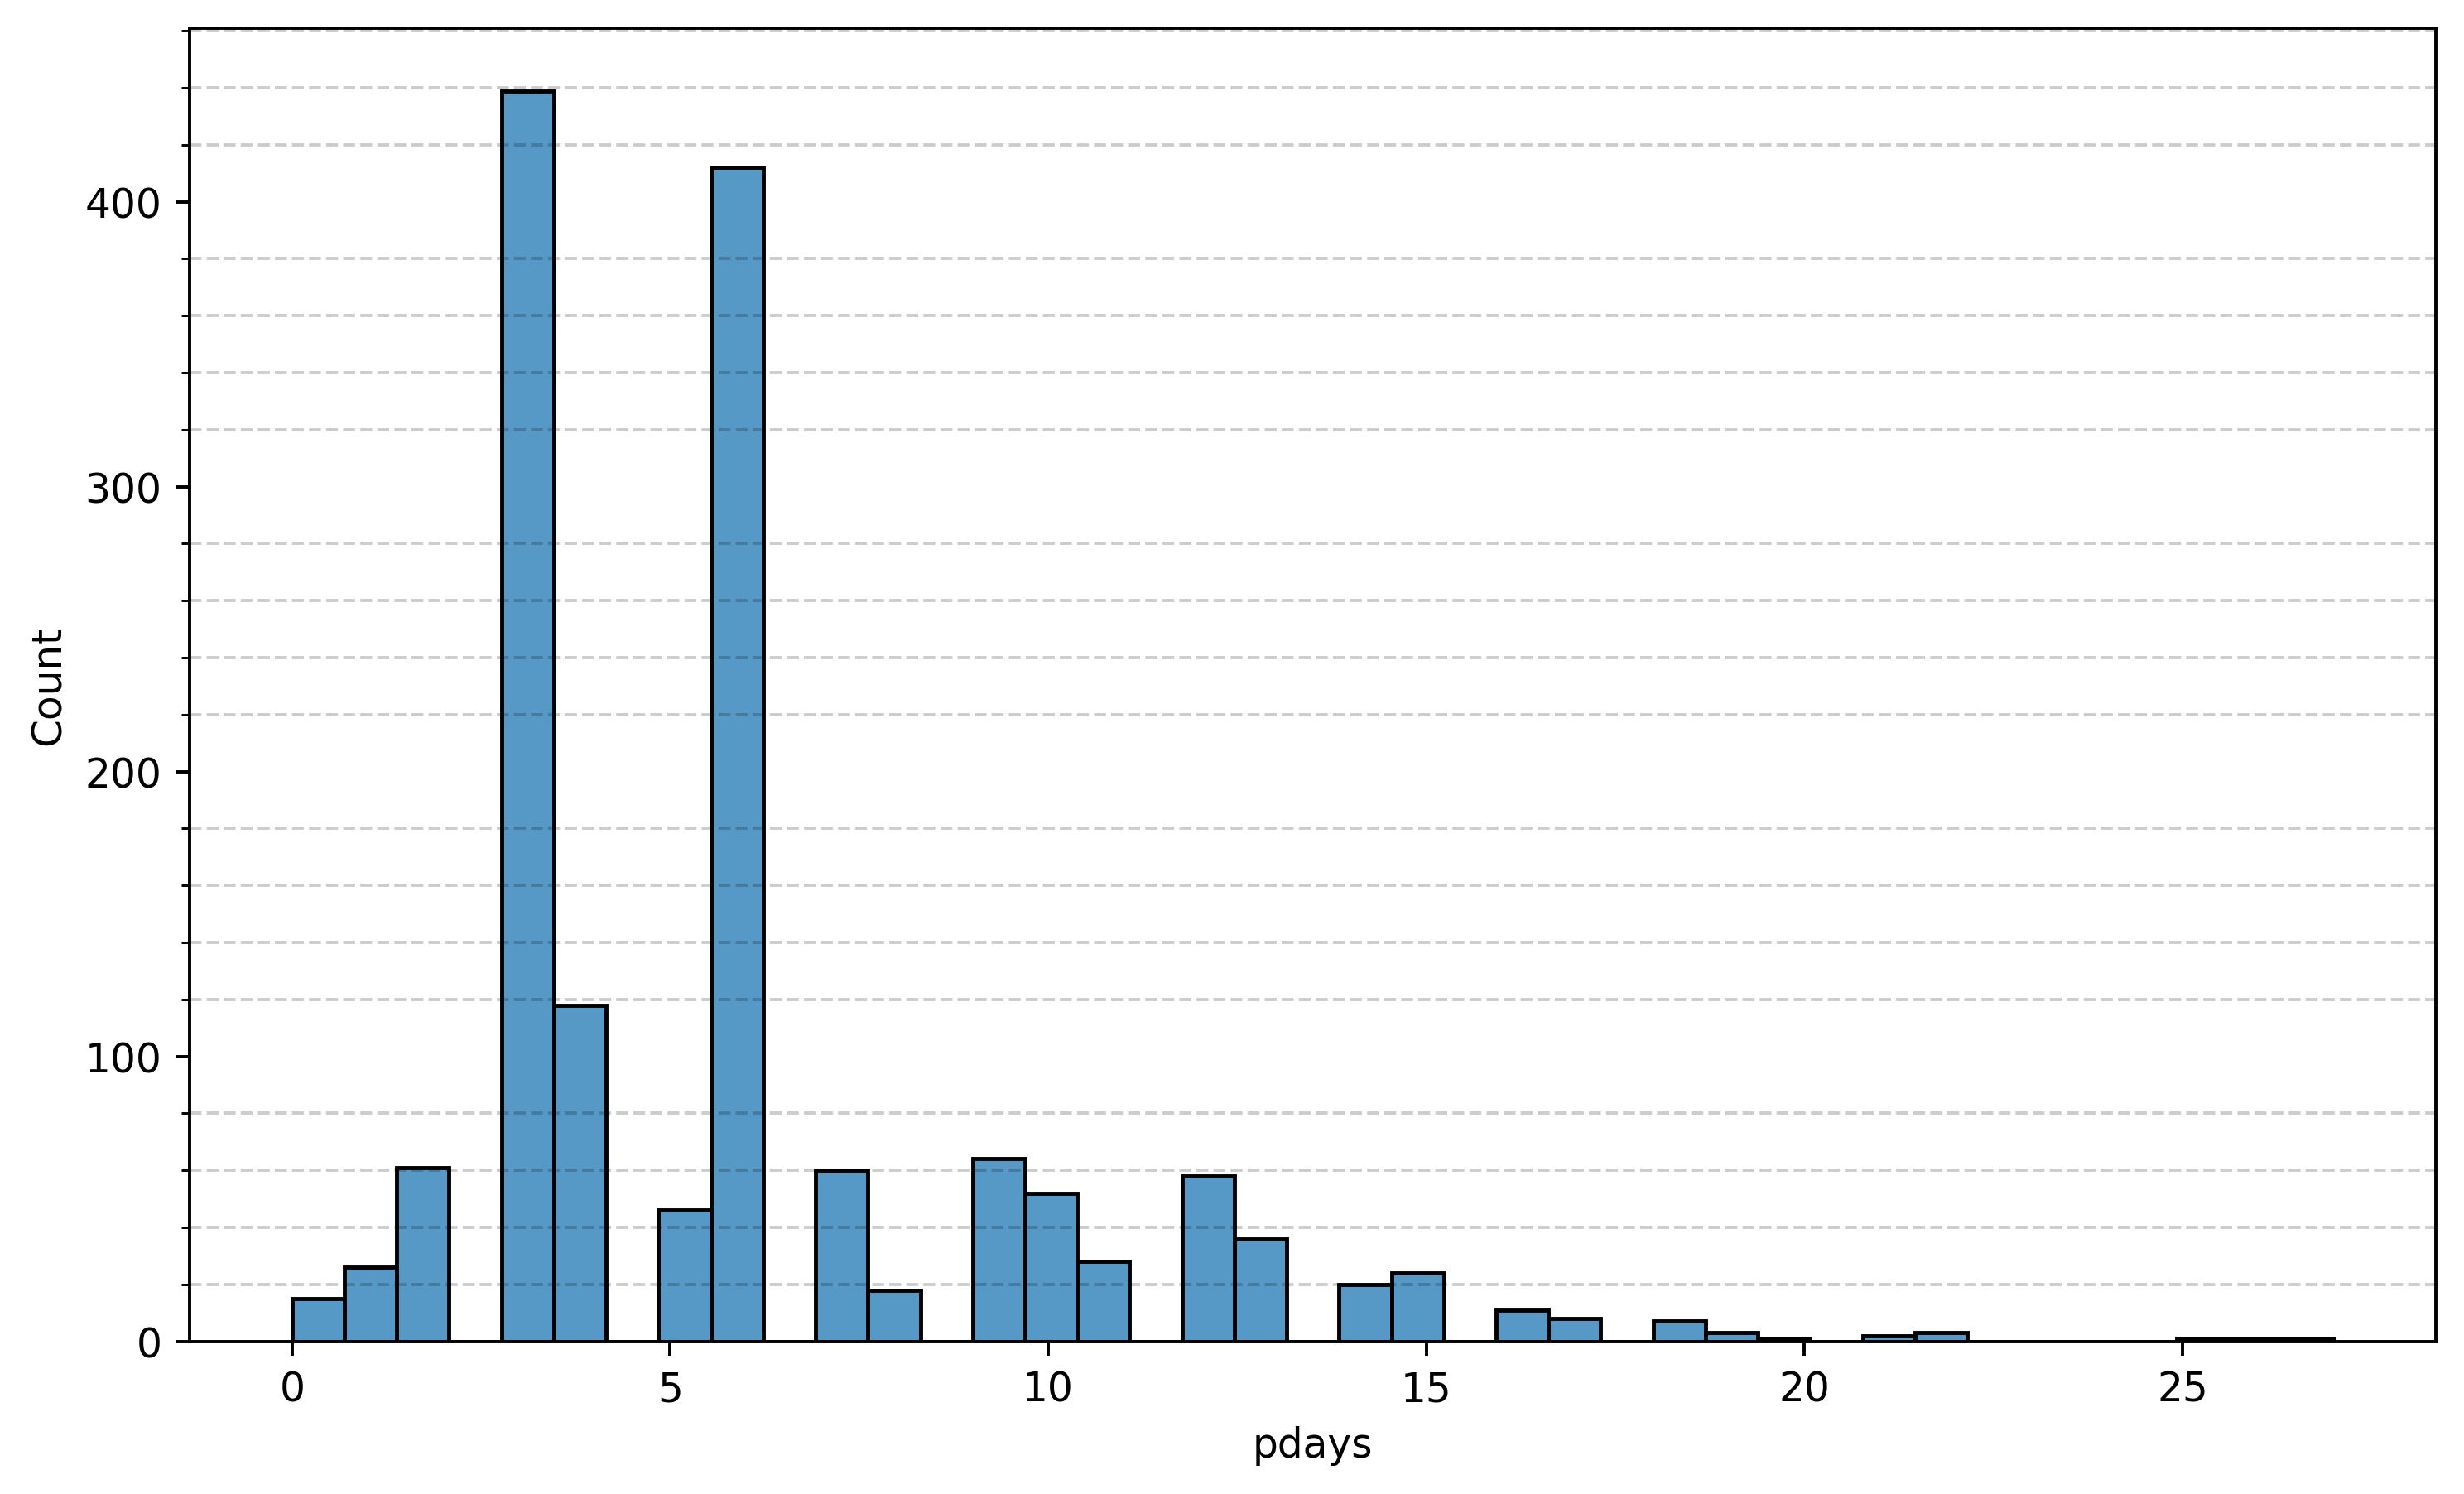

In [10]:
fig, ax = plt.subplots(figsize=(10, 6),dpi=350)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(which='minor', color='black',alpha=0.2, linestyle='--')
sns.histplot(data=df[df['pdays']!=999],x='pdays')

**Contact duration - contact with customer made, how long did call last?**

(0.0, 2000.0)

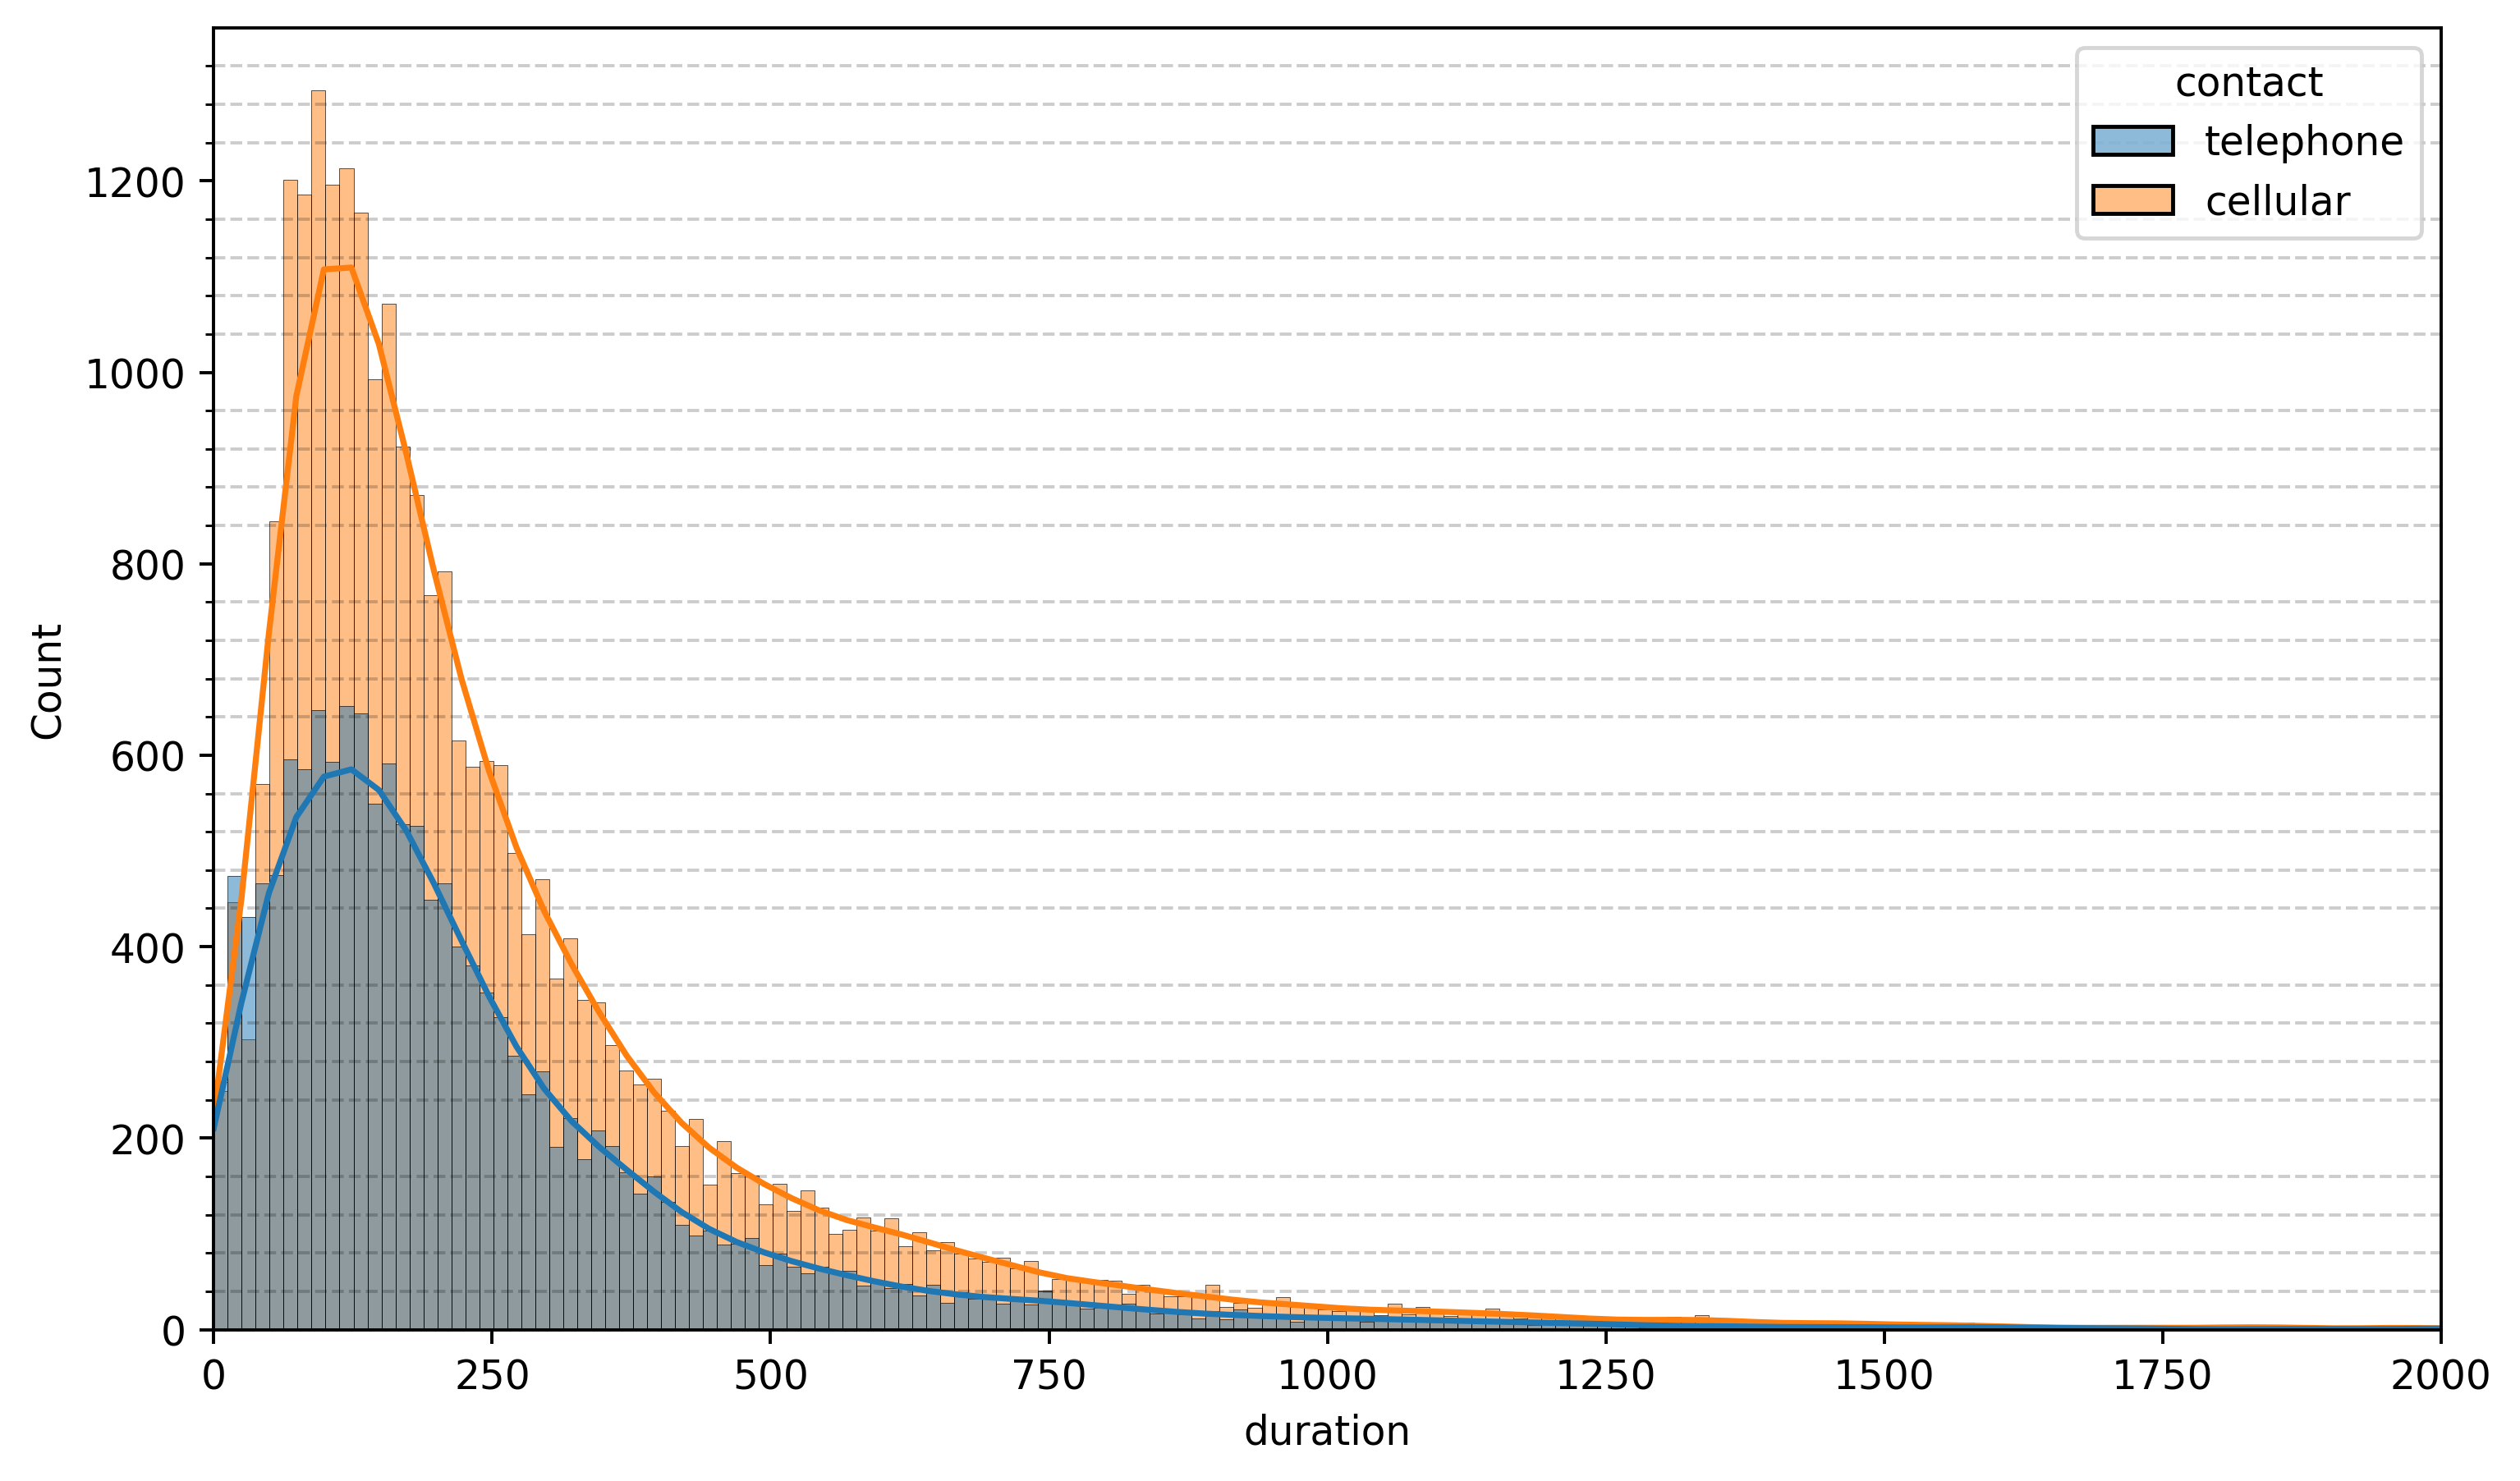

In [11]:
fig, ax = plt.subplots(figsize=(10, 6),dpi=350)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(which='minor', color='black',alpha=0.2, linestyle='--')
sns.histplot(data=df,x='duration',hue='contact',kde=True)
plt.xlim(0,2000)

* 15 - previous: number of contacts performed before this campaign and for this client (numeric)
* 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success"

<AxesSubplot:xlabel='previous', ylabel='count'>

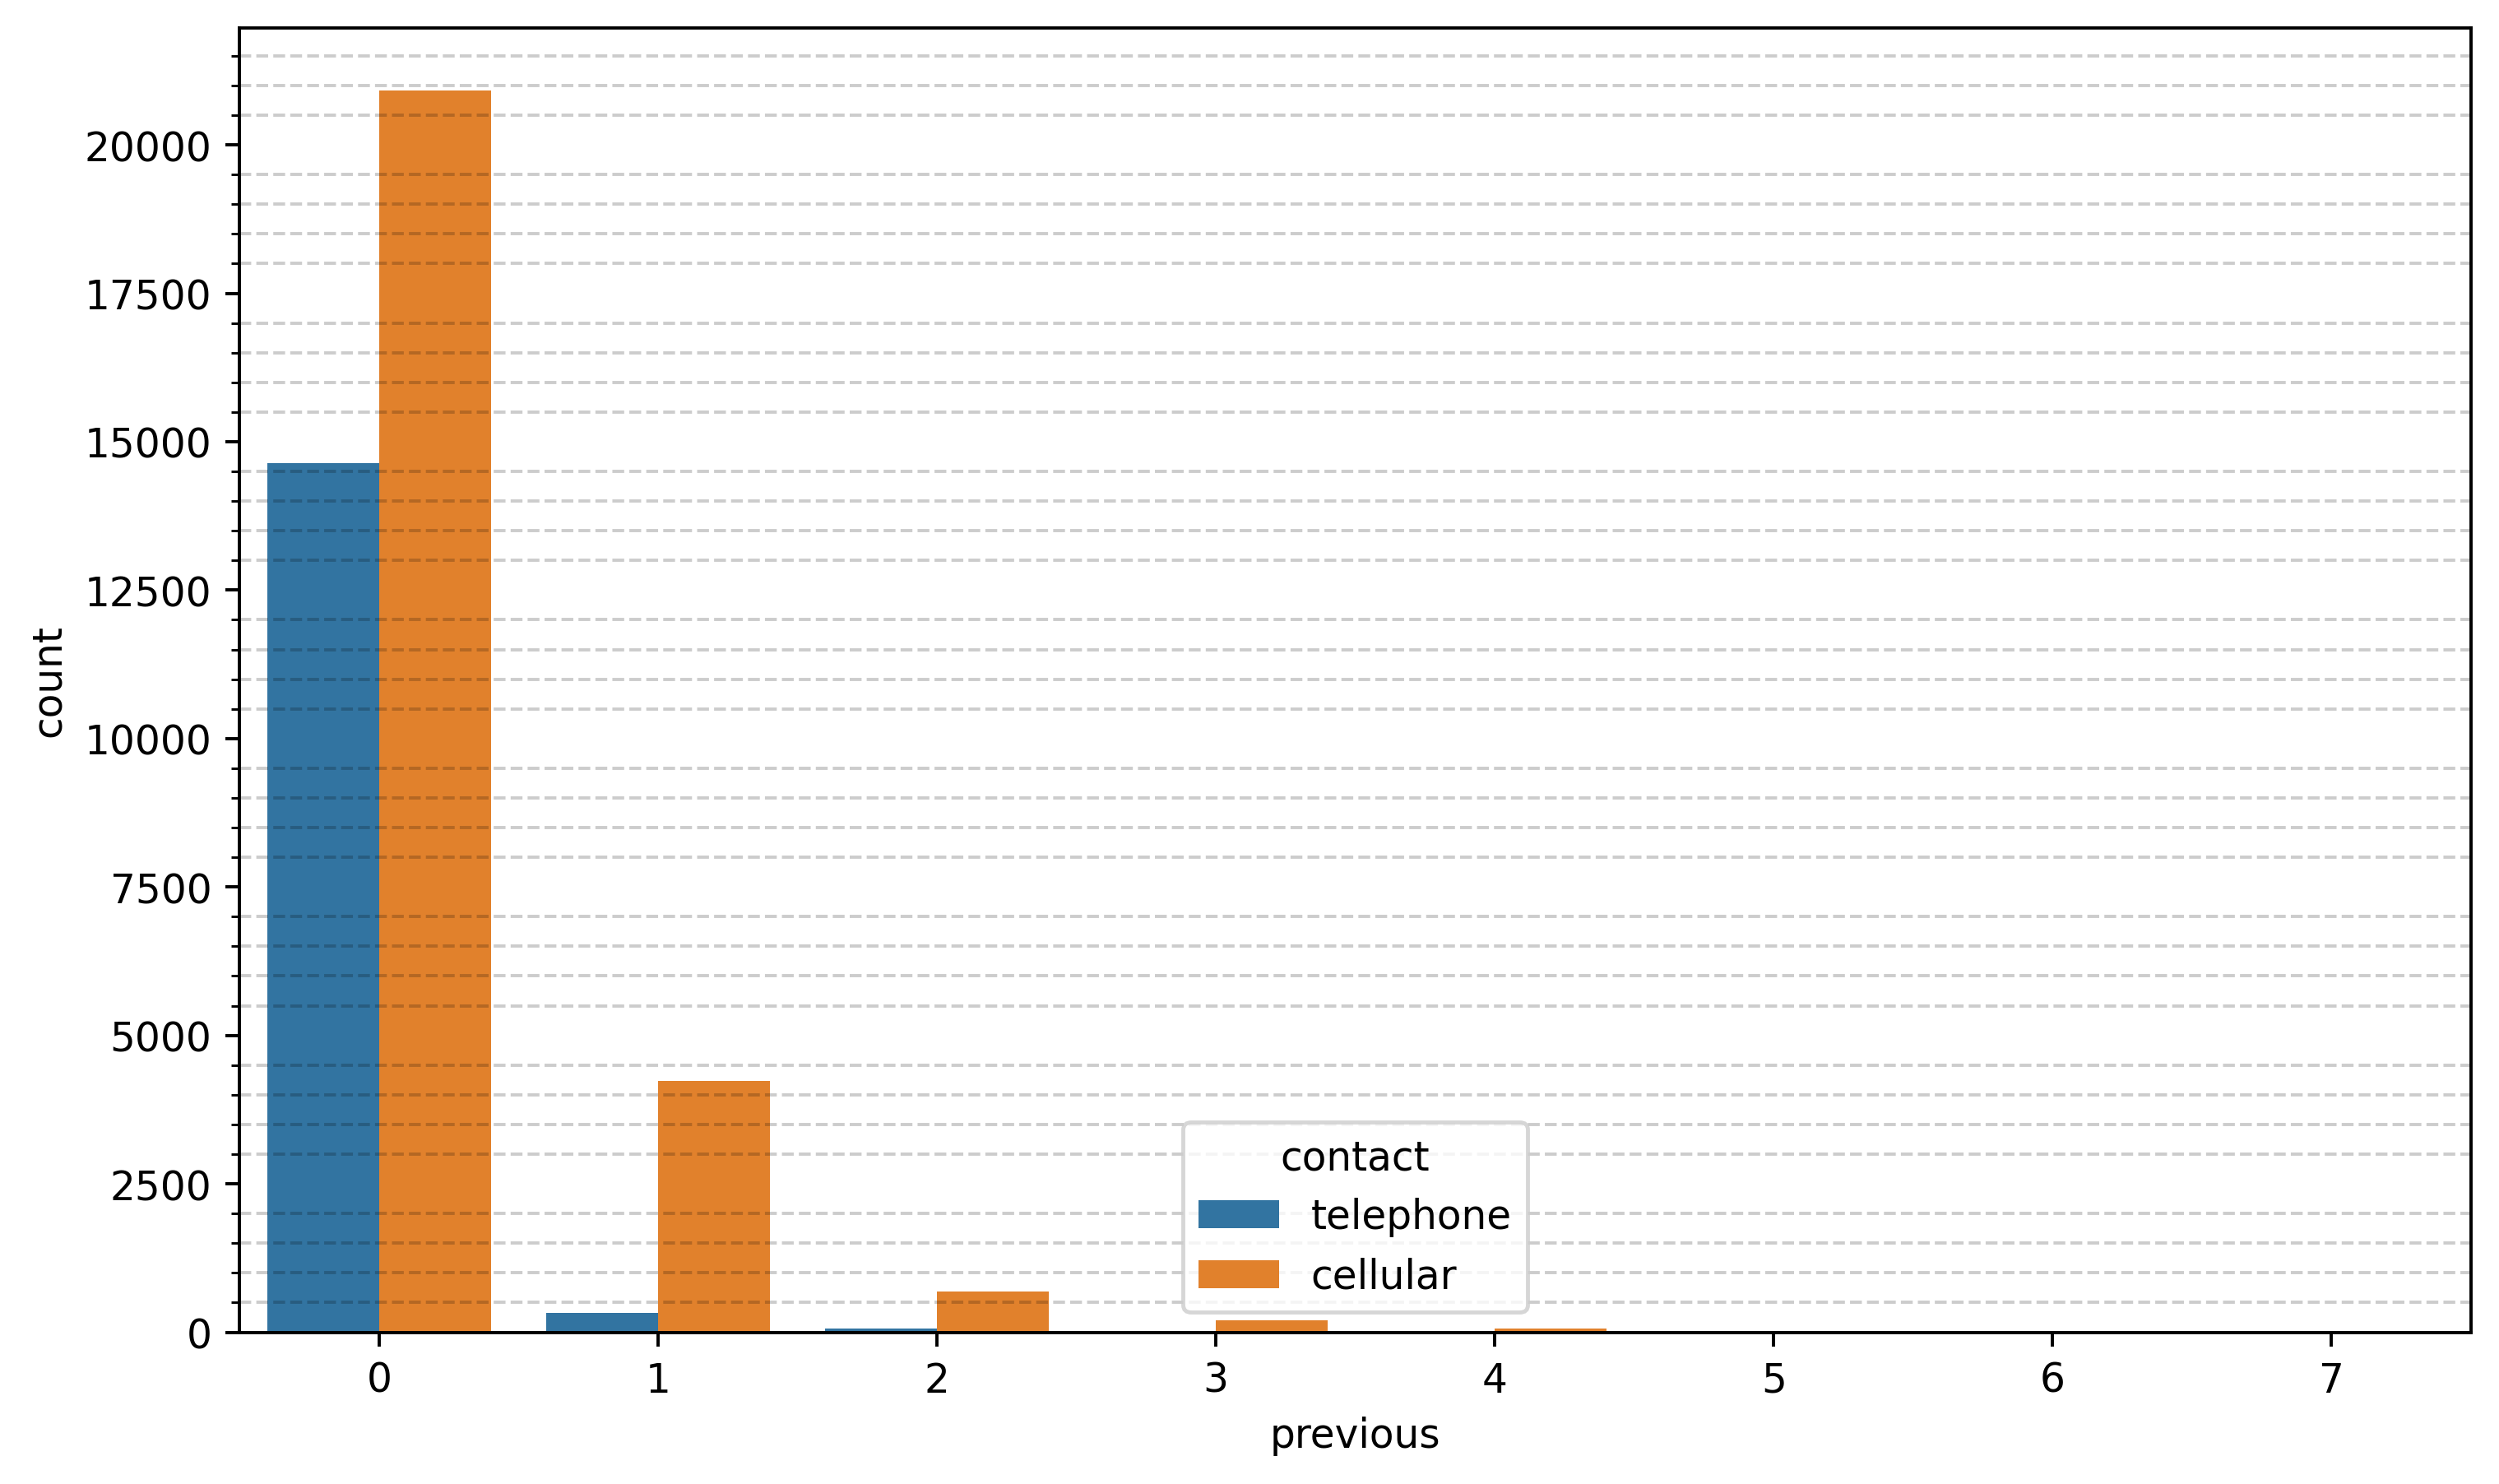

In [12]:
fig, ax = plt.subplots(figsize=(10, 6),dpi=350)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(which='minor', color='black',alpha=0.2, linestyle='--')
sns.countplot(data=df,x='previous',hue='contact')

<AxesSubplot:xlabel='contact', ylabel='count'>

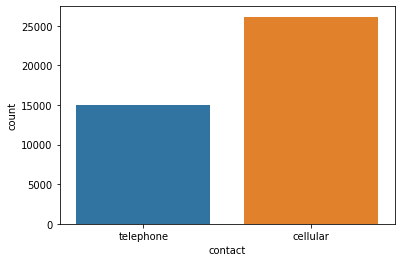

In [13]:
sns.countplot(data=df,x='contact')

In [14]:
# df['previous'].value_counts()
df['previous'].value_counts().sum()-36954
# 36954 vs. 8257

4234

## Categorical Features

In [15]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

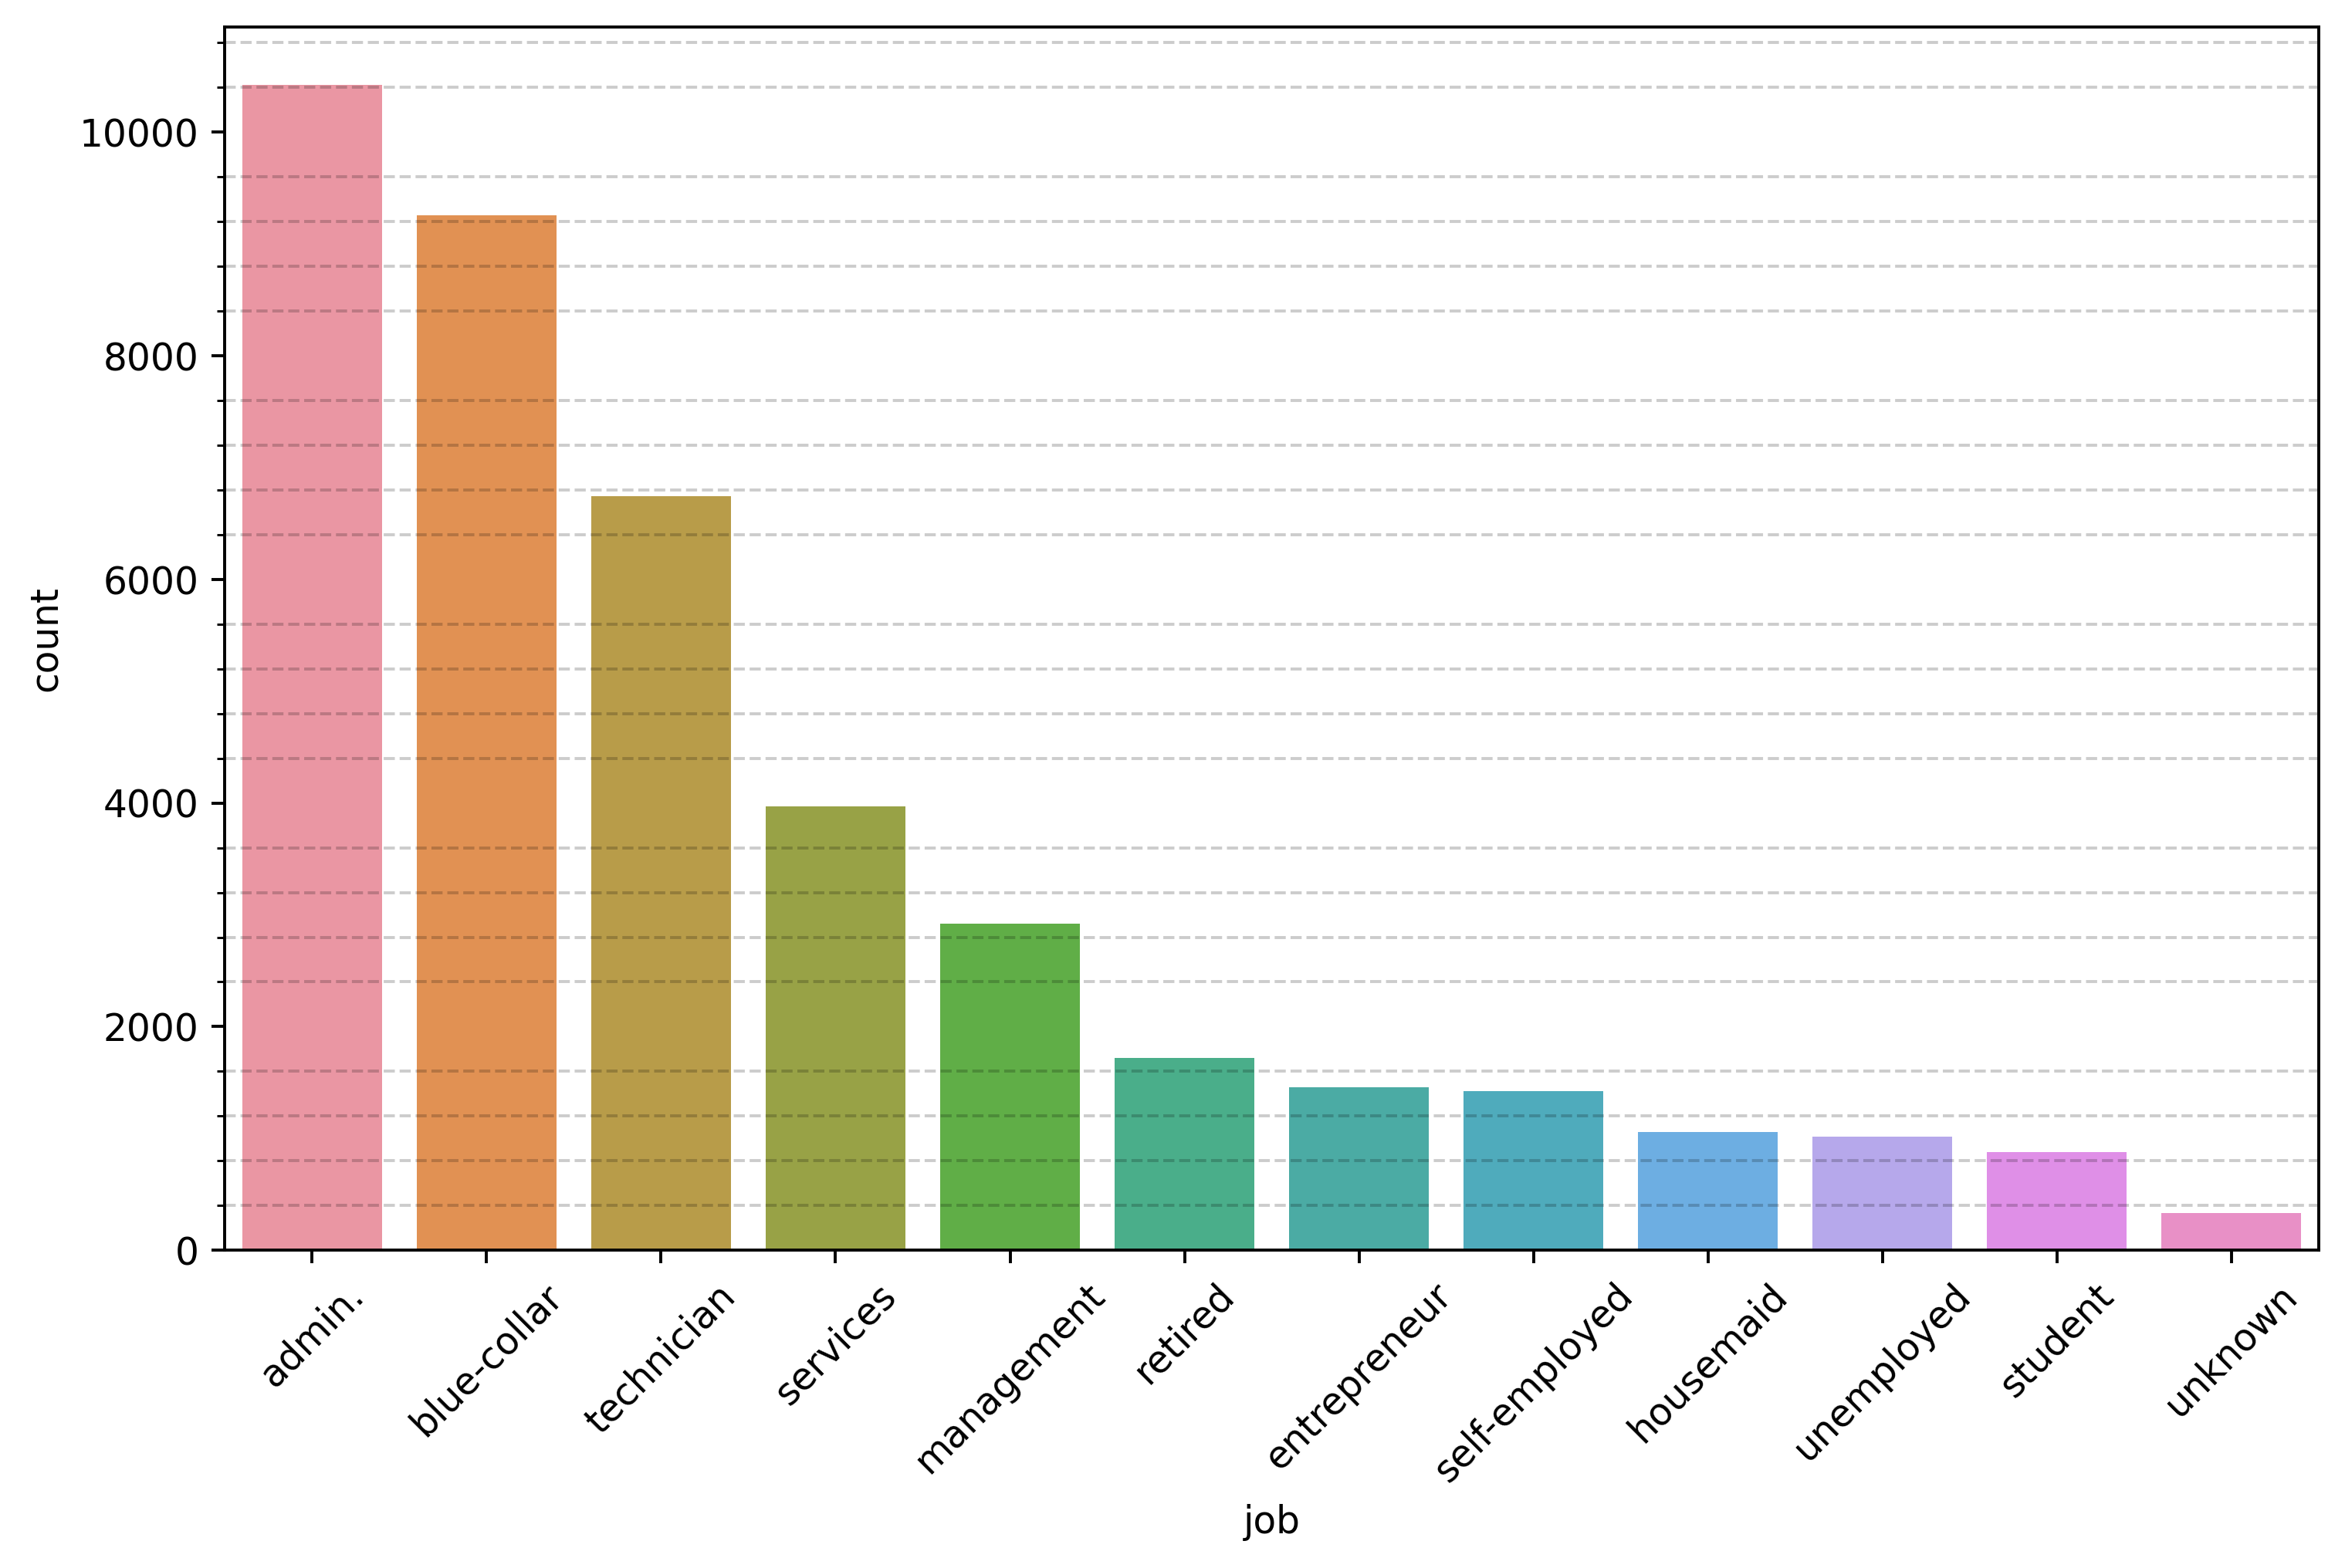

In [16]:
fig, ax = plt.subplots(figsize=(10, 6),dpi=350)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(which='minor', color='black',alpha=0.2, linestyle='--')
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='job',order=df['job'].value_counts().index)
plt.xticks(rotation=45);

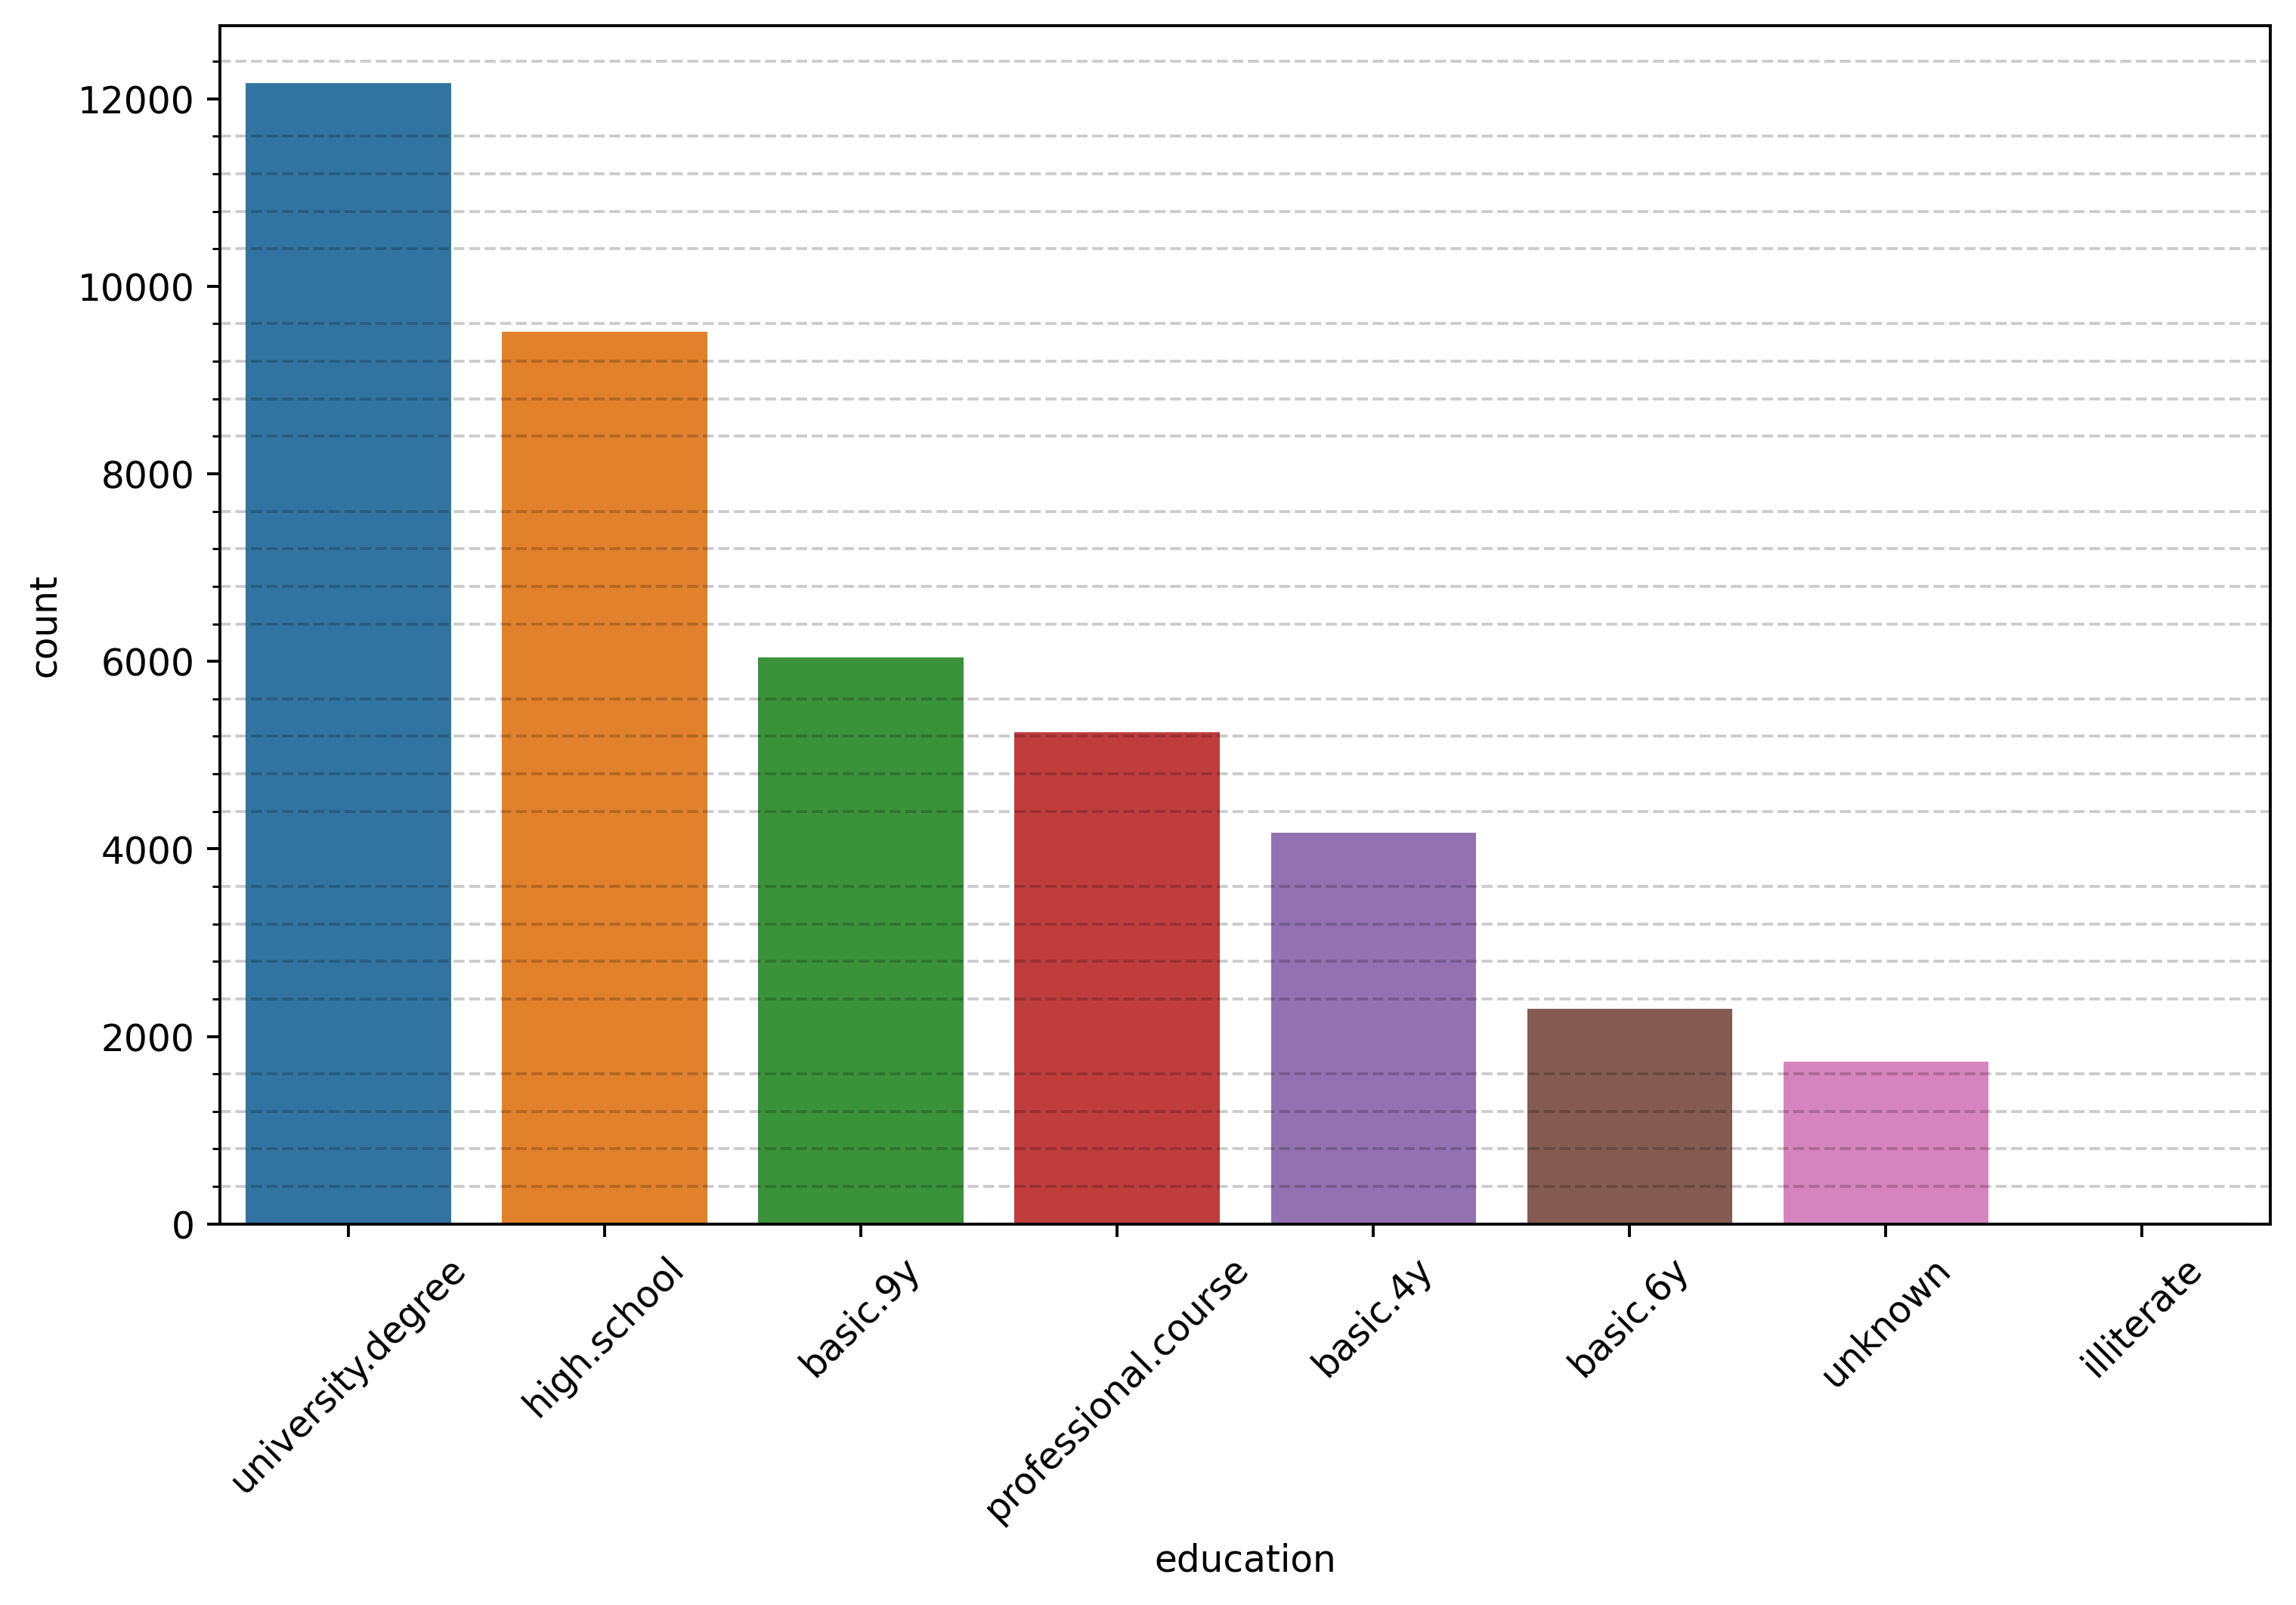

In [17]:
fig, ax = plt.subplots(figsize=(10, 6),dpi=350)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(which='minor', color='black',alpha=0.2, linestyle='--')
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=45);

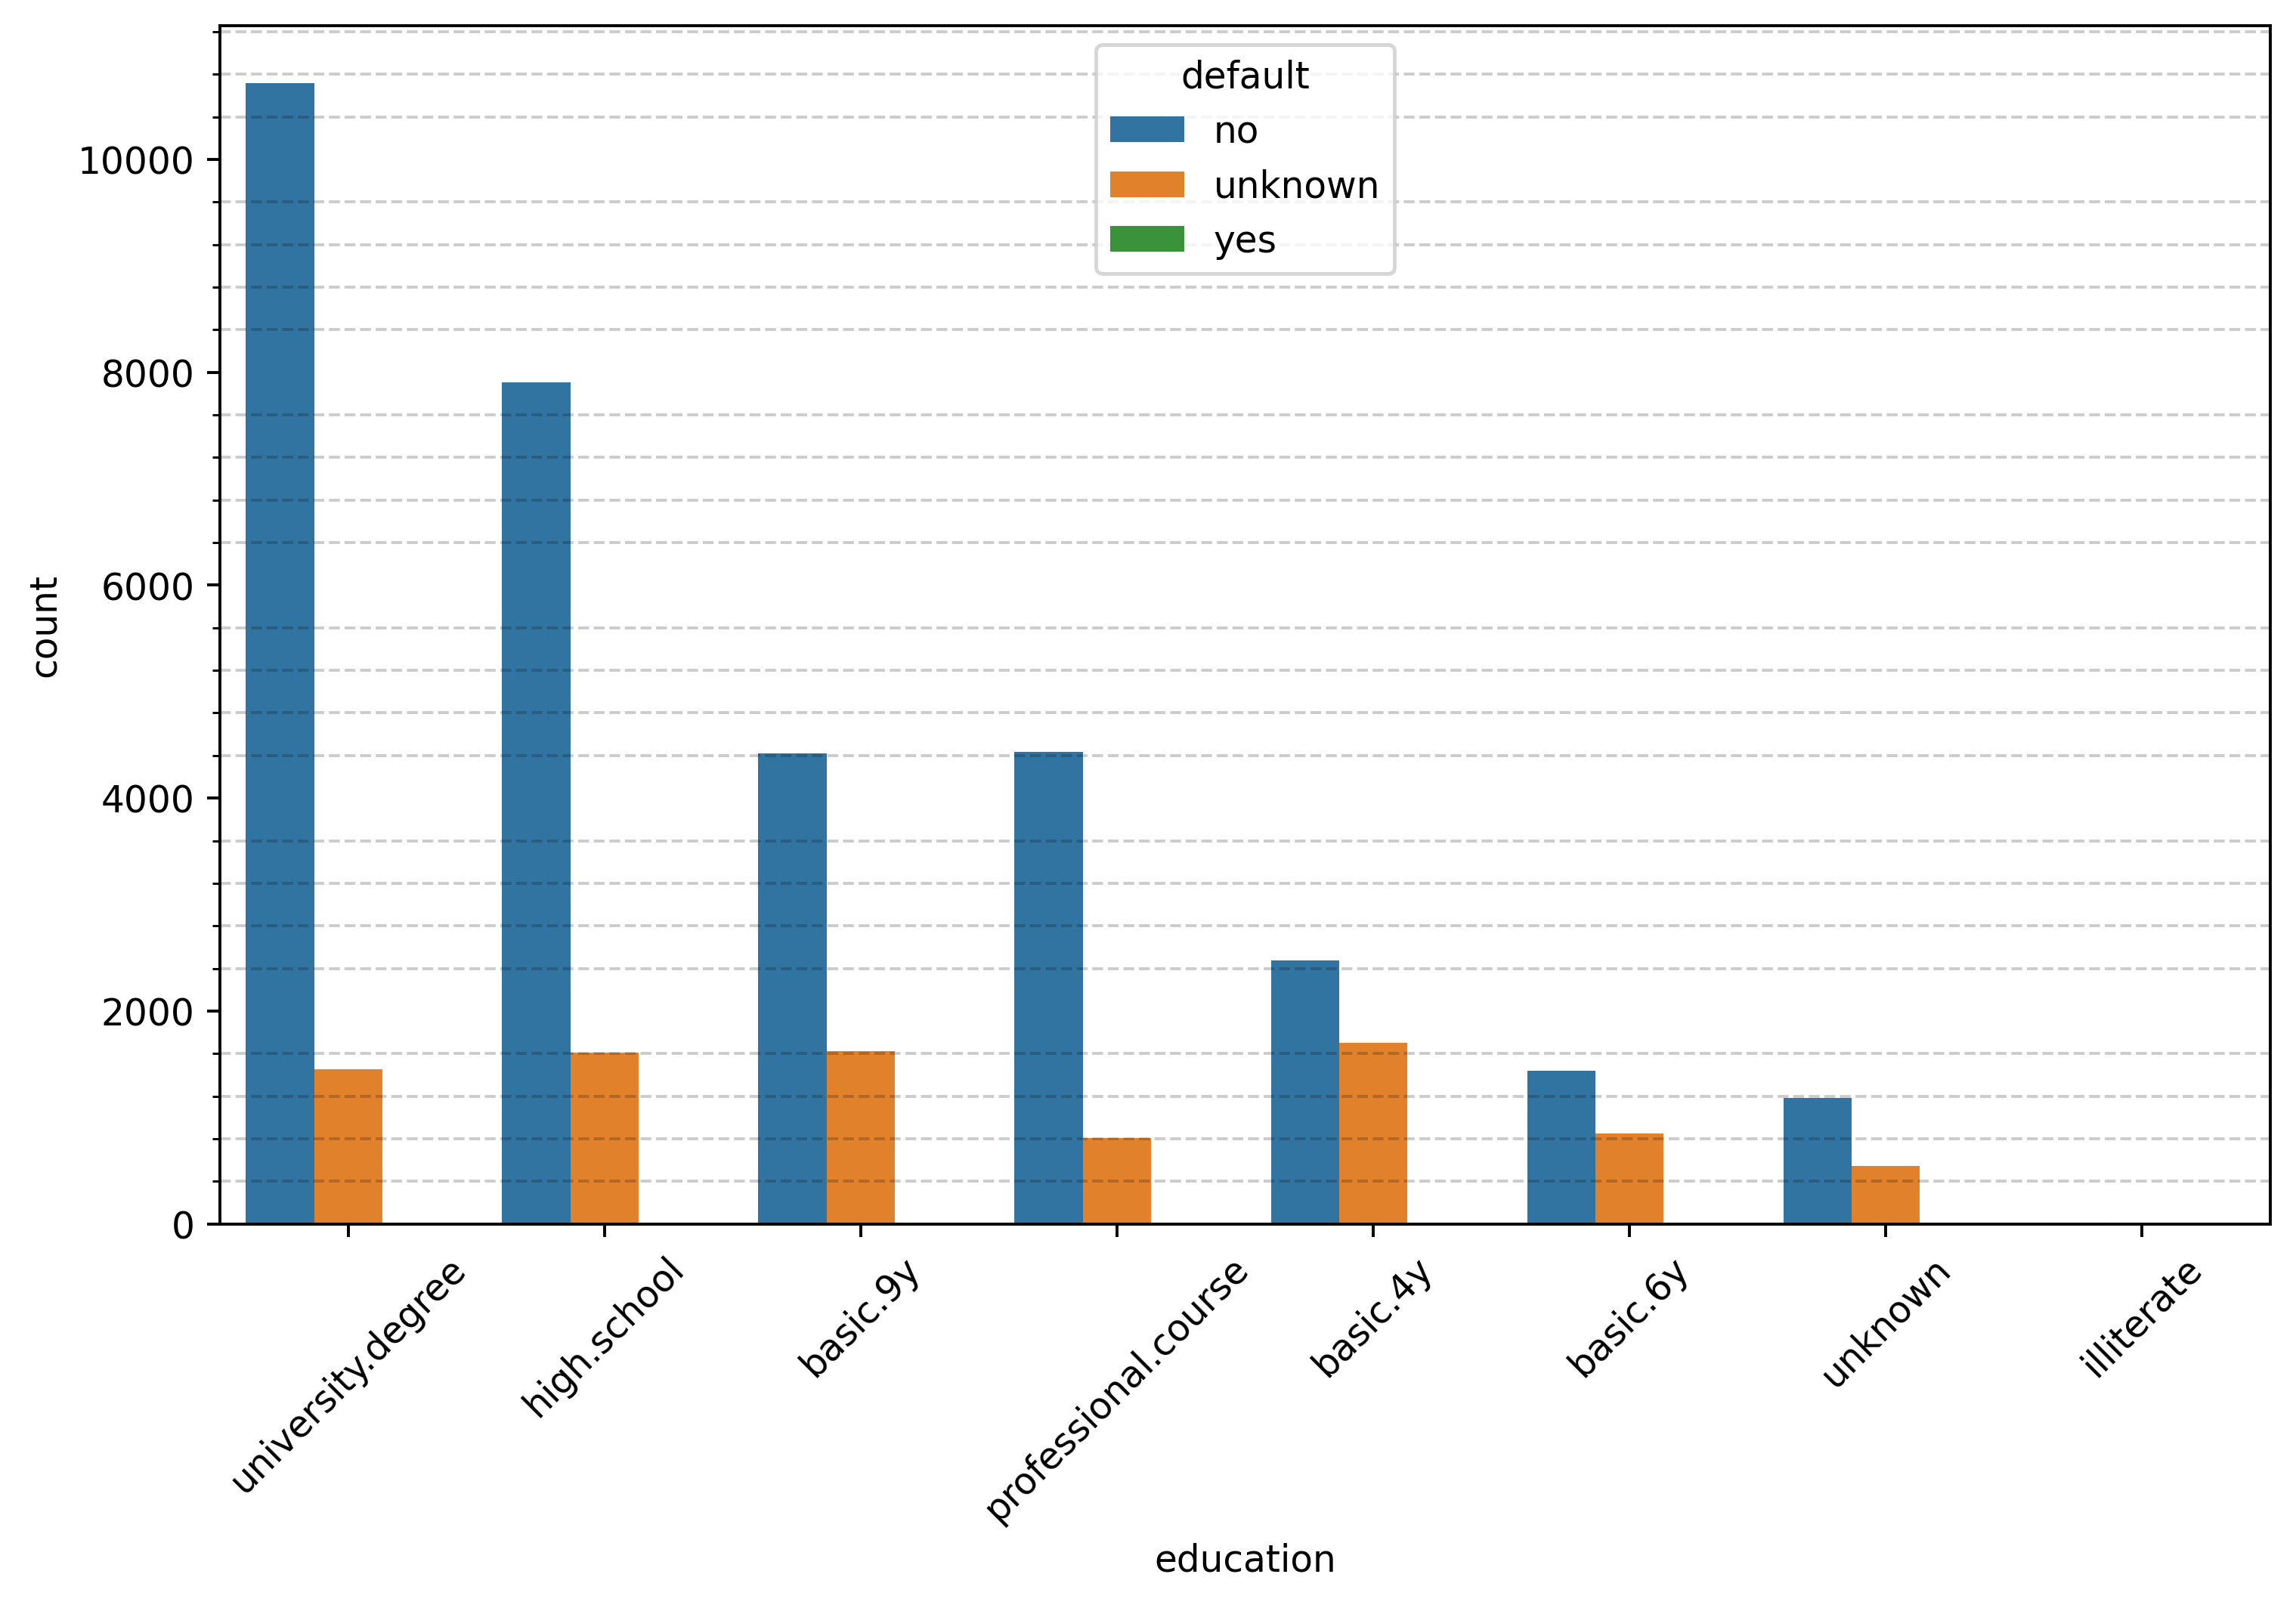

In [18]:
fig, ax = plt.subplots(figsize=(10, 6),dpi=350)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(which='minor', color='black',alpha=0.2, linestyle='--')
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')
plt.xticks(rotation=45);

<AxesSubplot:xlabel='default', ylabel='count'>

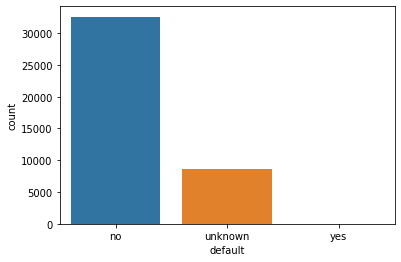

In [19]:
sns.countplot(data=df,x='default')

In [20]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

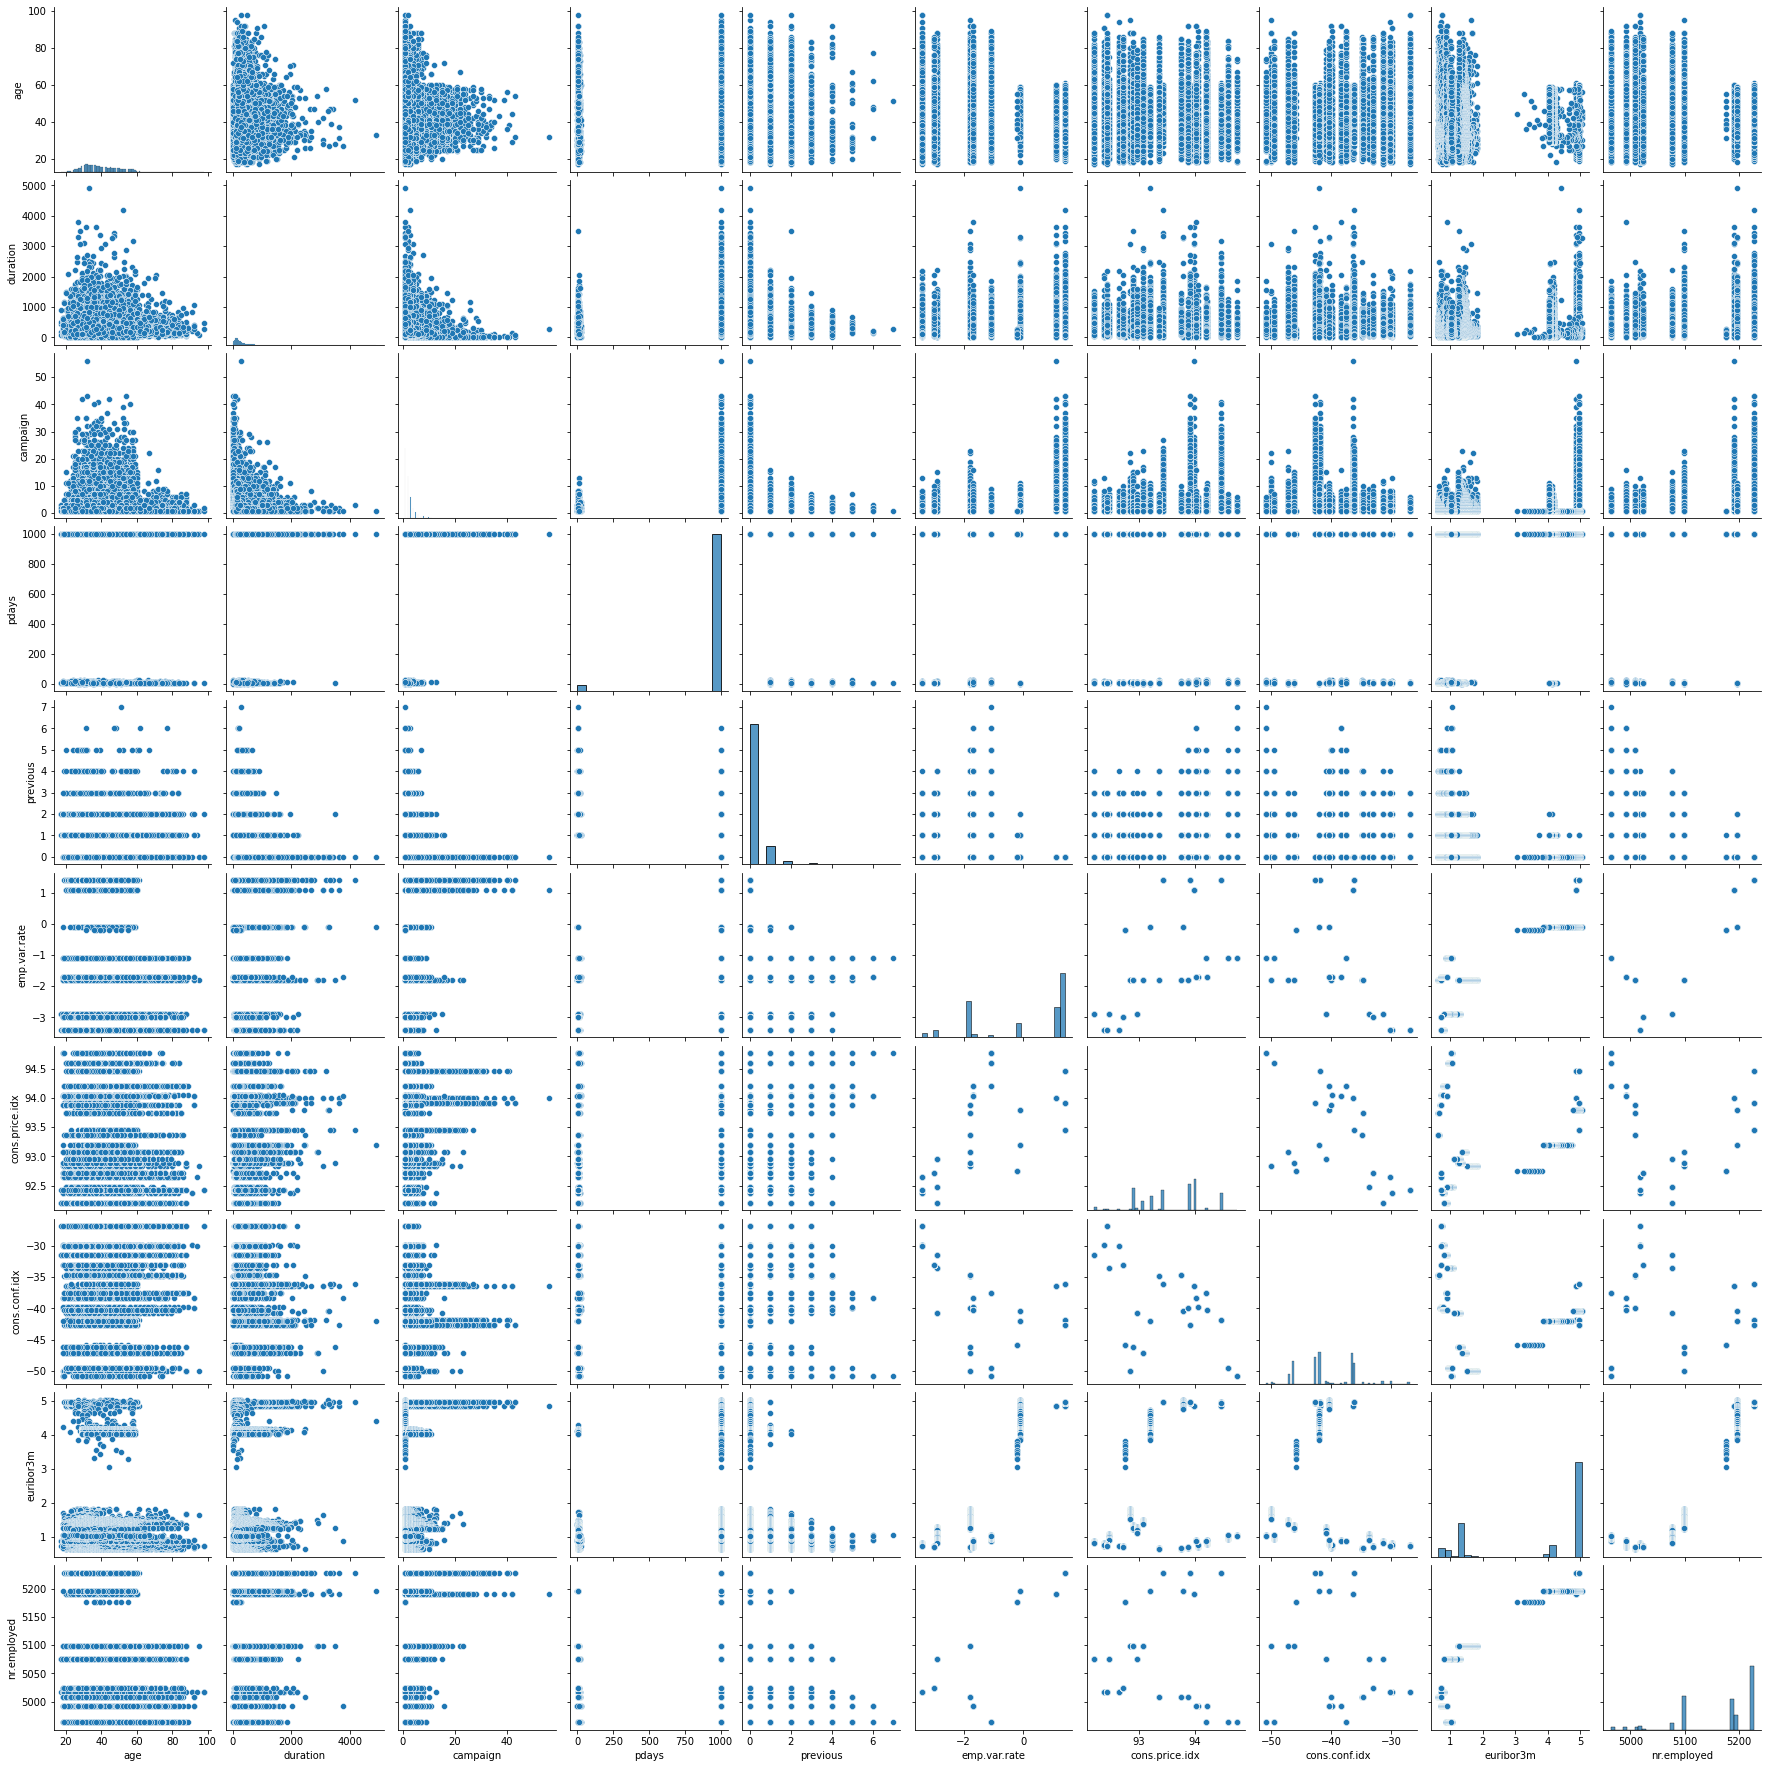

In [21]:
# THIS TAKES A LONG TIME!
sns.pairplot(df)

## Clustering

### Data Preparation

**UNSUPERVISED LEARNING REMINDER: NO NEED TO TRAIN TEST SPLIT!! NO LABEL TO "TEST" AGAINST!**

We do however need to transform categorical features into numeric ones where it makes sense to do so, as well as scaling the data due to distance being a key factor in clustering.

In [22]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

In [23]:
X = pd.get_dummies(df)

In [24]:
X

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  ...  day_of_week_fri  \
0              -36.4      4.857       5191.0  ...                0   
1              -36.4      4.857       5191.0  ...                0   
2              -36.4      4.857       5191.0  ...                0   
3              -36.4      4.857       5191.0  ...                0   
4              -36.4      4.857       5191.0  ...                0   
...              ...        ...          ...  ...              ...   
41183          -50.8      1.028       4963.6  ...                1   
41184          -50.8      1.028       4963.6  ...                1   
41185          -50.8      1.028       4963.6  ...                1   
41186          -50.8      1.028       4963.6  ...                1   
41187          -50.8      1.028       4963.6  ...                1   

       day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0                    1                0                0                0   
1                    1                0                0                0   
2                    1                0                0                0   
3                    1                0                0                0   
4                    1                0                0                0   
...                ...              ...              ...              ...   
41183                0                0                0                0   
41184                0                0                0                0   
41185                0                0                0                0   
41186                0                0                0                0   
41187                0                0                0                0   

       poutcome_failure  poutcome_nonexistent  poutcome_success  \
0                     0                     1                 0   
1                     0                     1                 0   
2                     0                     1                 0   
3                     0                     1                 0   
4                     0                     1                 0   
...                 ...                   ...               ...   
41183                 0                     1                 0   
41184                 0                     1                 0   
41185                 0                     1                 0   
41186                 0                     1                 0   
41187                 1                     0                 0   

       subscribed_no  subscribed_yes  
0                  1               0  
1                  1               0  
2                  1               0  
3                  1               0  
4                  1               0  
...              ...             ...  
41183              0               1  
41184              1               0  
41185              1               0  
41186              0               1  
41187              1              

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaled_X = scaler.fit_transform(X)

### Creating and Fitting a KMeans Model

Note of our method choices here:

* fit(X[, y, sample_weight])
    * Compute k-means clustering.

* fit_predict(X[, y, sample_weight])
    * Compute cluster centers and predict cluster index for each sample.

* fit_transform(X[, y, sample_weight])
    * Compute clustering and transform X to cluster-distance space.

* predict(X[, sample_weight])
    * Predict the closest cluster each sample in X belongs to.

In [28]:
from sklearn.cluster import KMeans

In [29]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` o

In [30]:
model = KMeans(n_clusters=2)

In [31]:
# Make sure to watch video to understand this line and fit() vs transform()
cluster_labels = model.fit_predict(scaled_X)

In [32]:
# IMPORTANT NOTE: YOUR 0s and 1s may be opposite of ours,
# makes sense, the number values are not significant!
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [33]:
len(scaled_X)

41188

In [34]:
len(cluster_labels)

41188

In [35]:
X['Cluster'] = cluster_labels

<AxesSubplot:>

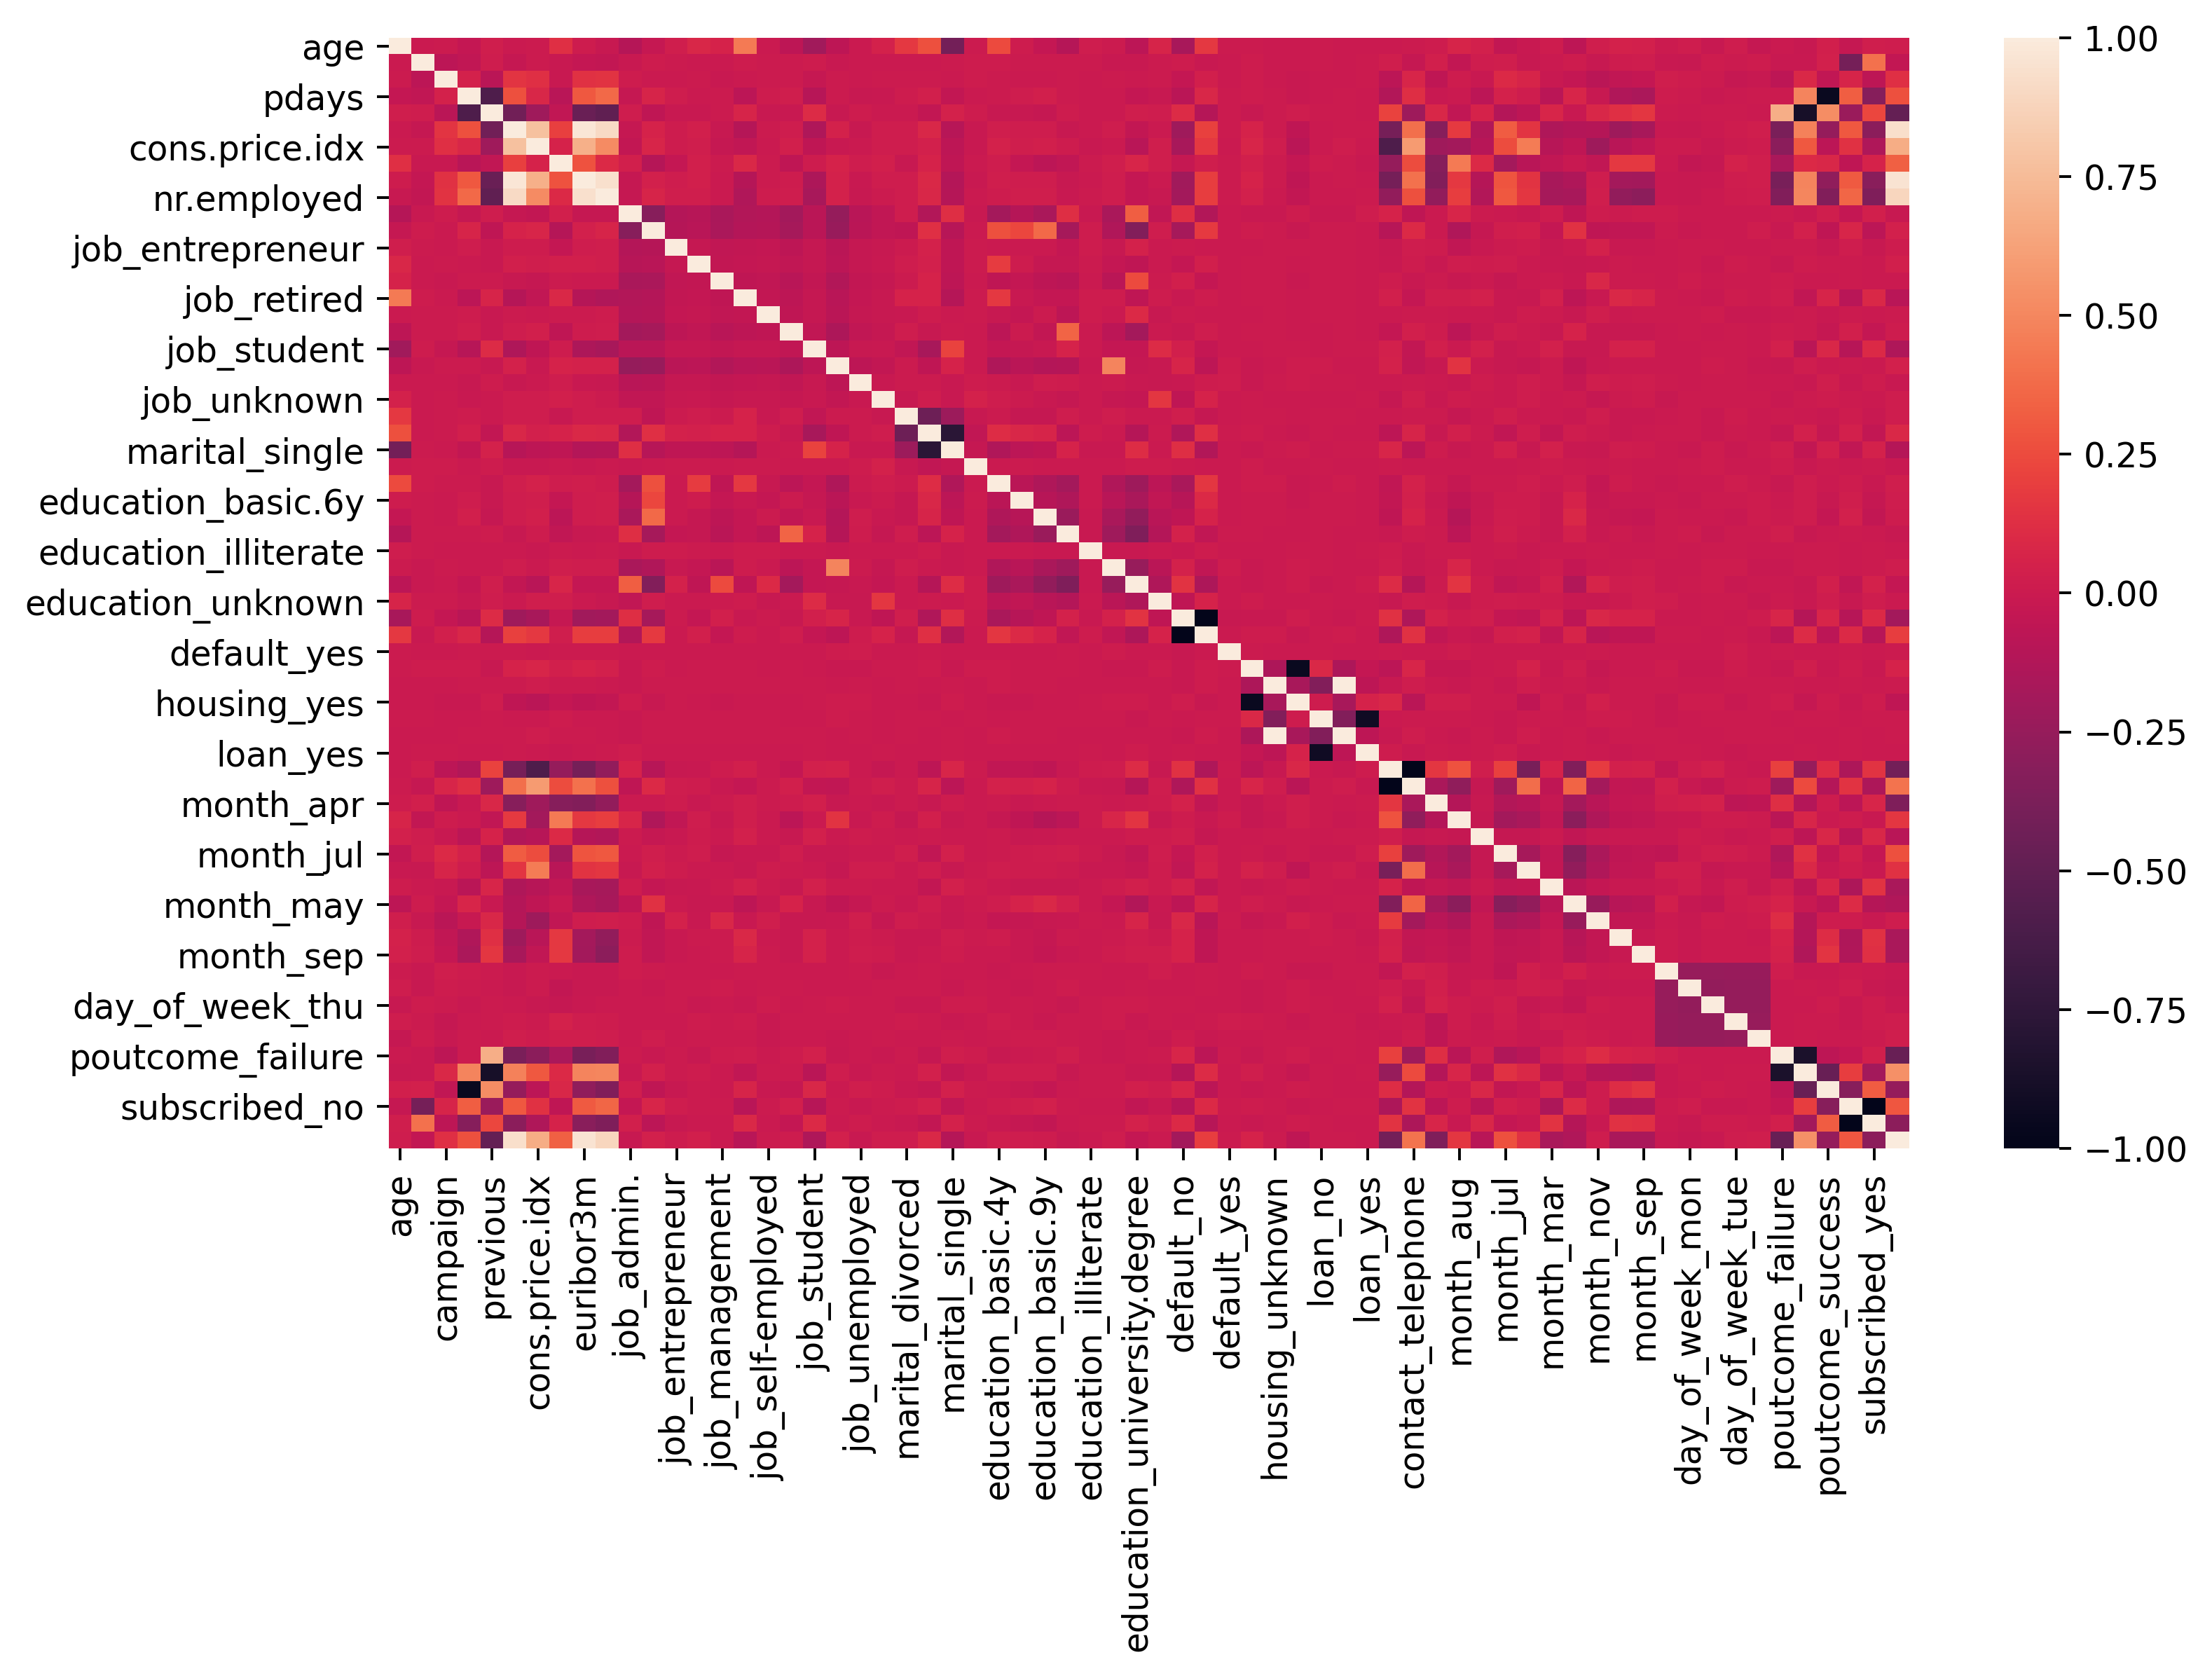

In [36]:
fig, ax = plt.subplots(figsize=(10, 6),dpi=350)
sns.heatmap(X.corr())

In [37]:
X.corr()['Cluster']

age                     0.019699
duration               -0.039894
campaign                0.129129
pdays                   0.267700
previous               -0.478467
                          ...   
poutcome_nonexistent    0.544377
poutcome_success       -0.254393
subscribed_no           0.294610
subscribed_yes         -0.294610
Cluster                 1.000000
Name: Cluster, Length: 66, dtype: float64

<AxesSubplot:>

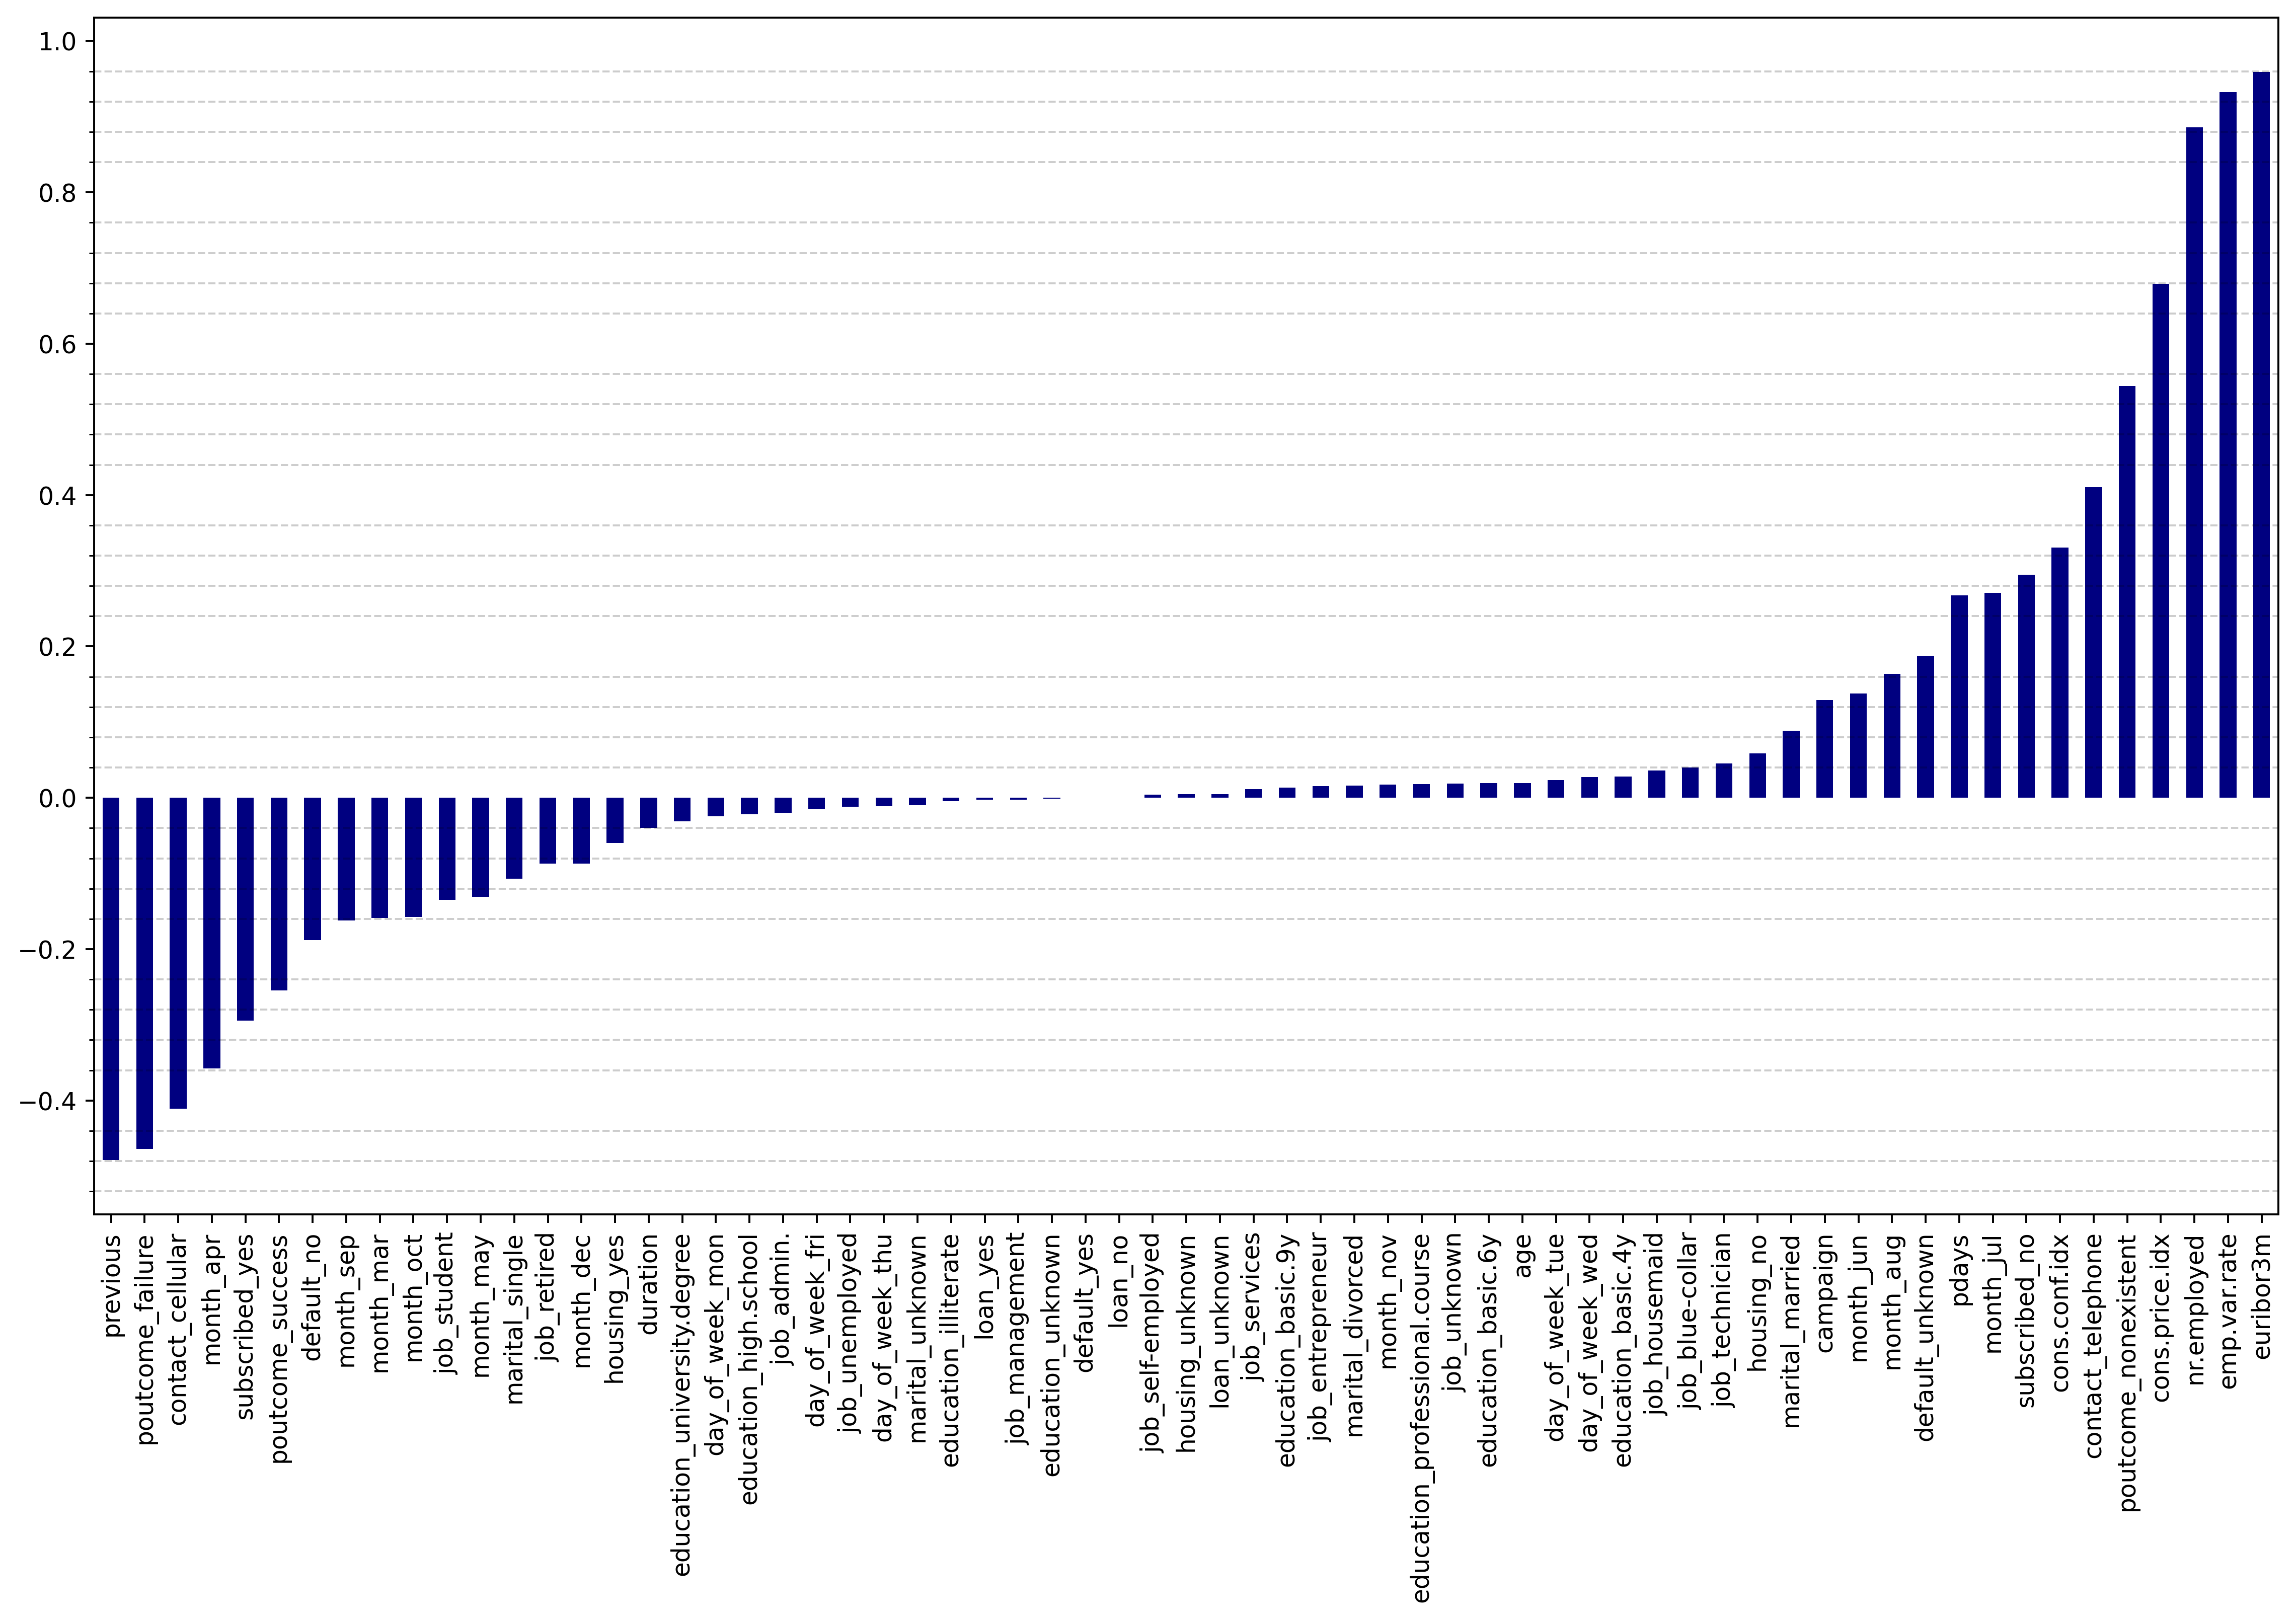

In [38]:
fig, ax = plt.subplots(figsize=(16, 9),dpi=350)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(which='minor', color='black',alpha=0.2, linestyle='--')
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar',cmap='jet')

## Choosing K Value

In [39]:
int(len(X.corr()['Cluster'])*0.8)+1

53

In [40]:
ssd = []
for k in range(2,int(len(X.corr()['Cluster'])*0.8)+1):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

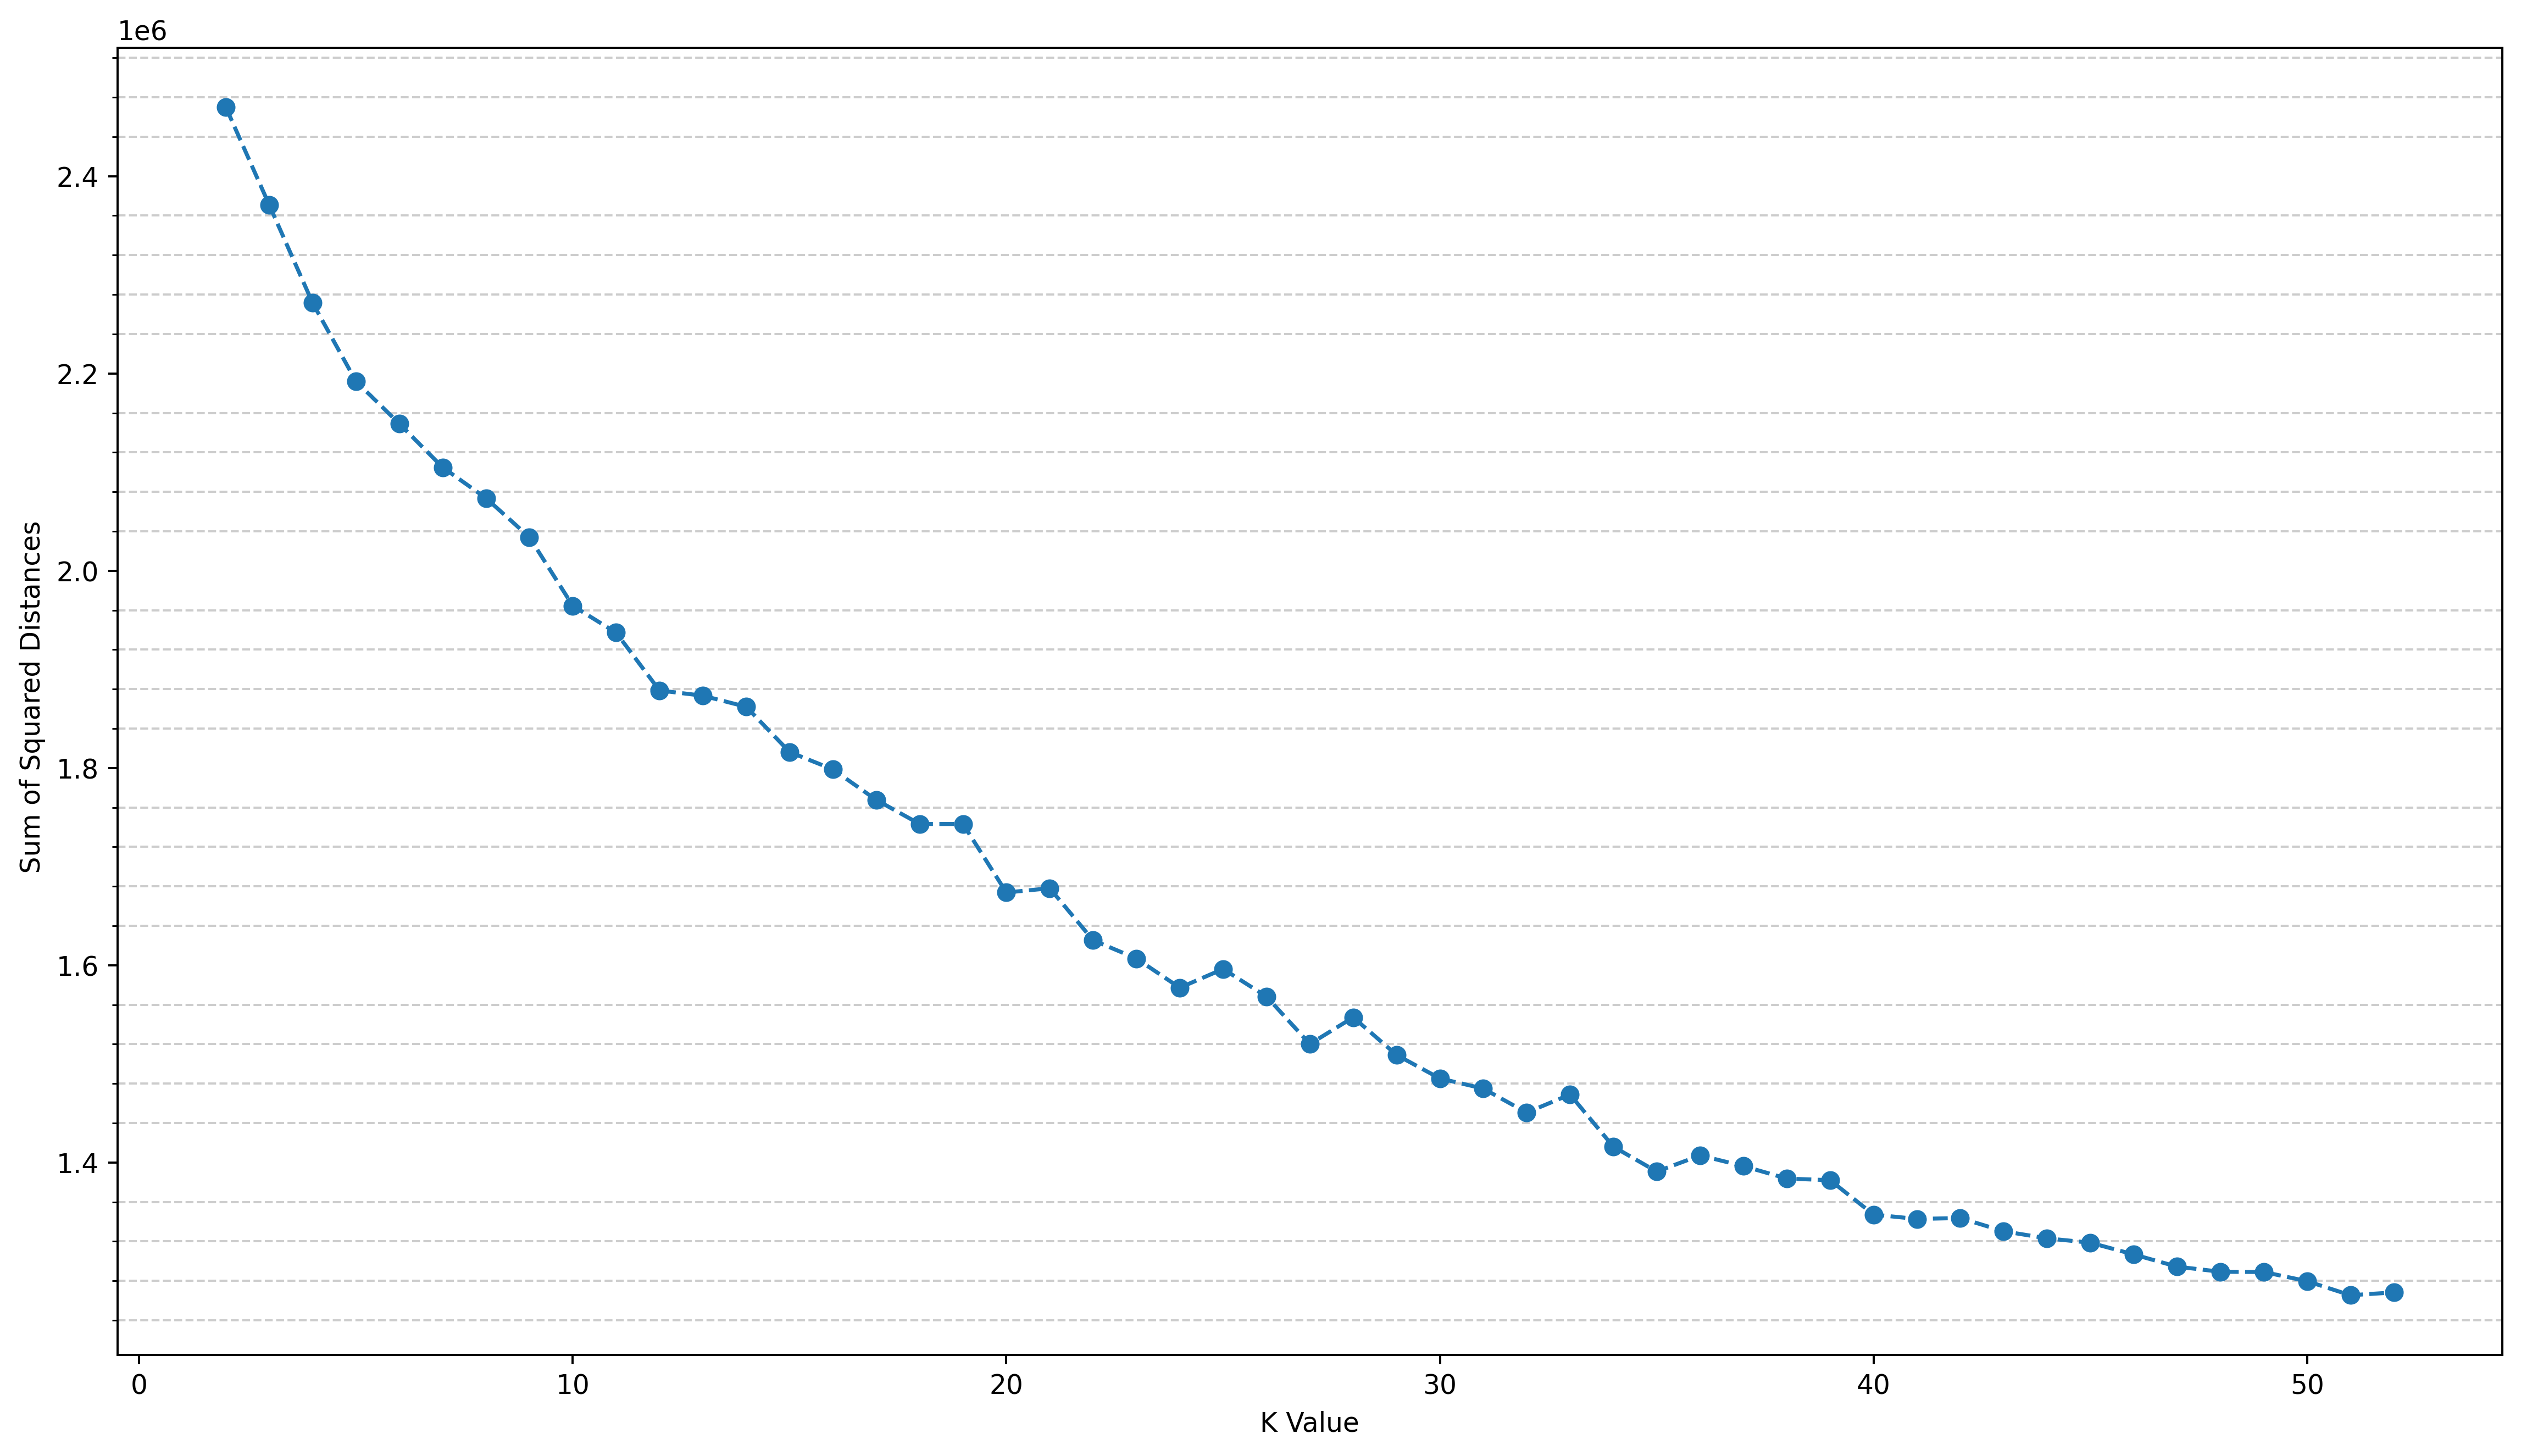

In [53]:
fig, ax = plt.subplots(figsize=(16, 9),dpi=350)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(which='minor', color='black',alpha=0.2, linestyle='--')
plt.plot(range(2,int(len(X.corr()['Cluster'])*0.8)+1),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

Analyzing SSE Reduction

In [42]:
ssd

[2469792.3616627757,
 2370786.4148400826,
 2271502.7268353496,
 2192021.2976422044,
 2149009.854317338,
 2104765.065137037,
 2073539.27362104,
 2033968.9435071803,
 1964432.4710015138,
 1937185.5957633513,
 1878594.5804956115,
 1873284.094070979,
 1862017.8516220455,
 1816236.3968548141,
 1798535.4922429377,
 1767629.2521630505,
 1743228.980053446,
 1743228.1746199492,
 1673752.9953968844,
 1678059.4653884387,
 1625379.0540661959,
 1606814.2115251555,
 1577195.3320447411,
 1596207.068190668,
 1568227.8464084824,
 1520124.748445041,
 1547173.4360907006,
 1509075.0197795255,
 1485194.7013723245,
 1474970.1448381587,
 1450587.8612810073,
 1468947.2360220242,
 1416044.0024134044,
 1390818.002801274,
 1407192.3394870667,
 1396335.6923535578,
 1383722.0704118363,
 1382062.9387054227,
 1347216.9006443233,
 1342771.2413674407,
 1343717.8825222242,
 1330268.9587741974,
 1323093.8146402074,
 1318686.7084425888,
 1306793.08874748,
 1294408.8194010619,
 1289238.2616693694,
 1288965.3472244106,
 12

In [43]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0              NaN
1    -99005.946823
2    -99283.688005
3    -79481.429193
4    -43011.443325
5    -44244.789180
6    -31225.791516
7    -39570.330114
8    -69536.472506
9    -27246.875238
10   -58591.015268
11    -5310.486425
12   -11266.242449
13   -45781.454767
14   -17700.904612
15   -30906.240080
16   -24400.272110
17       -0.805433
18   -69475.179223
19     4306.469992
20   -52680.411322
21   -18564.842541
22   -29618.879480
23    19011.736146
24   -27979.221782
25   -48103.097963
26    27048.687646
27   -38098.416311
28   -23880.318407
29   -10224.556534
30   -24382.283557
31    18359.374741
32   -52903.233609
33   -25225.999612
34    16374.336686
35   -10856.647134
36   -12613.621942
37    -1659.131706
38   -34846.038061
39    -4445.659277
40      946.641155
41   -13448.923748
42    -7175.144134
43    -4407.106198
44   -11893.619695
45   -12384.269346
46    -5170.557732
47     -272.914445
48    -9263.483084
49   -14282.011456
50     2871.550024
dtype: float64

<AxesSubplot:>

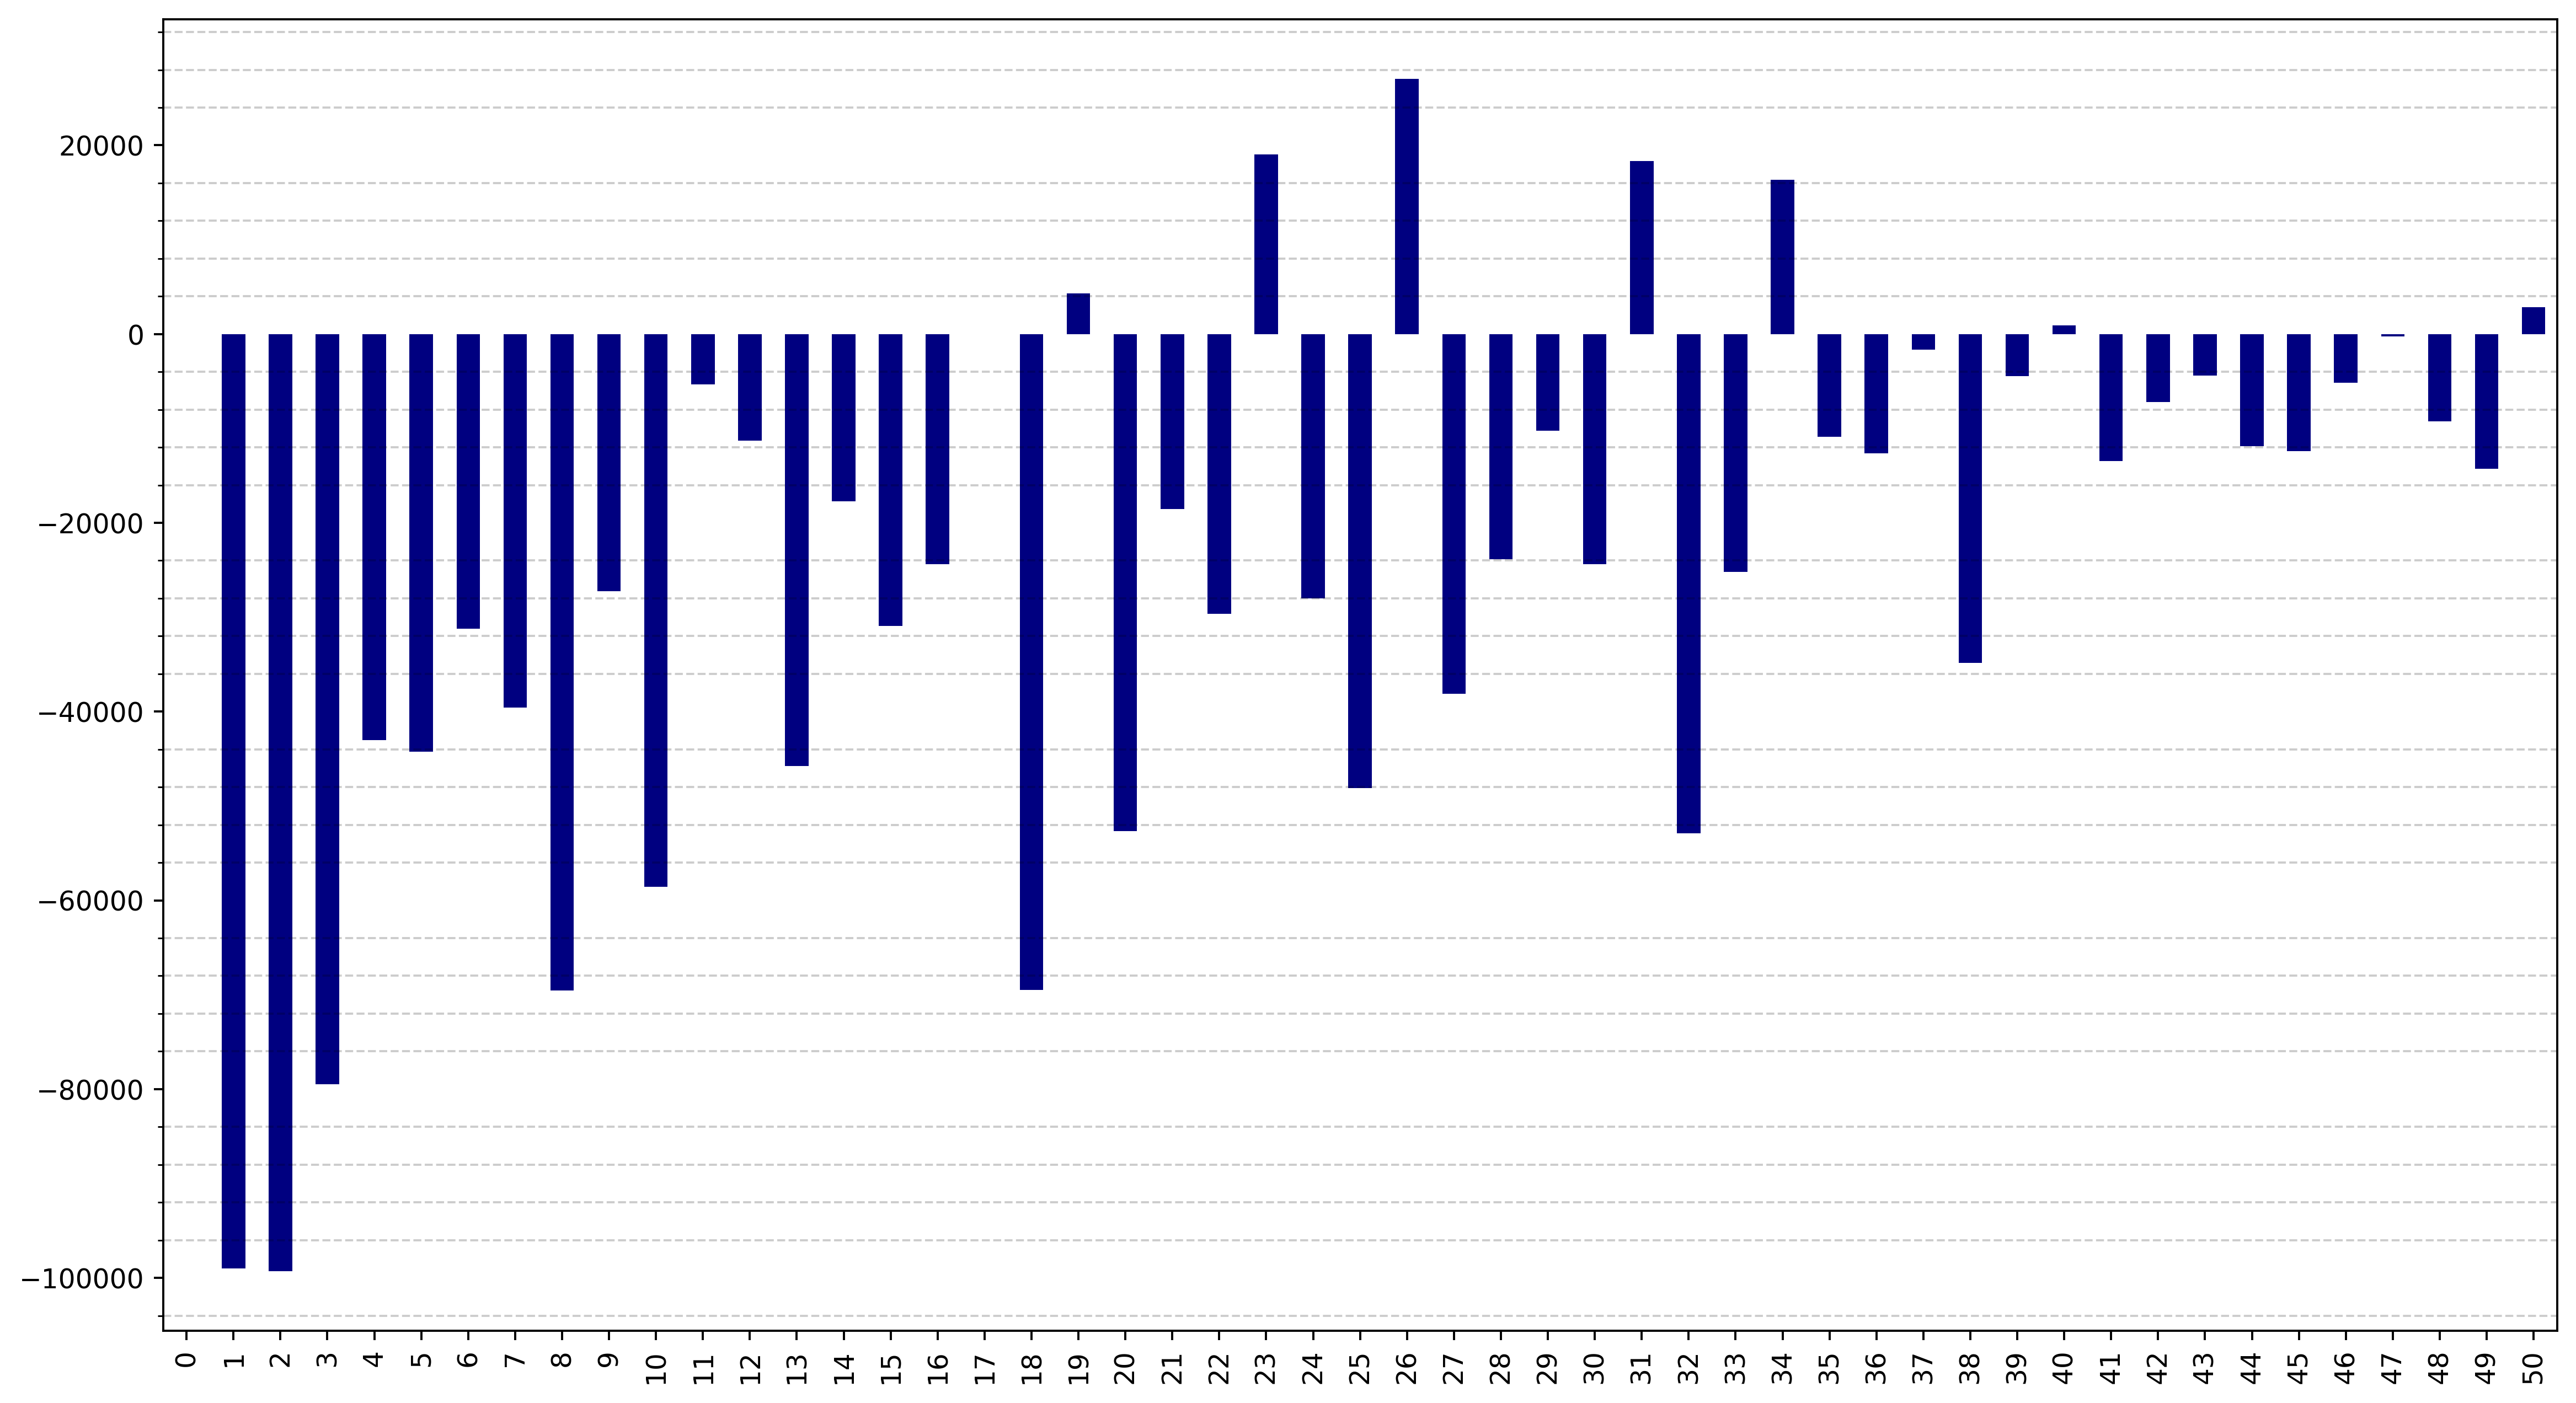

In [54]:
fig, ax = plt.subplots(figsize=(16, 9),dpi=350)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(which='minor', color='black',alpha=0.2, linestyle='--')
pd.Series(ssd).diff().plot(kind='bar',cmap='jet')